In [2]:
%load_ext autoreload
%autoreload 2

import gc
import os
import pickle
from collections import Counter

import numpy
import pandas
from math import exp, sqrt, log

from keras.models import load_model
from keras import Input, Model
from keras.layers import Lambda, subtract, concatenate
from sklearn.externals import joblib

from importlib import reload
from matplotlib import pyplot as plt
from random import random, shuffle, choice, randint

from classes import Student, Question
from utils import generate_student_name, create_qs, create_students, generate_attempts, calculate_pass_probability, attempt_q

import random
import math

from NN_utils import BigTable, WeightClip

print("started")

use_saved = True
do_train = True
do_testing = True
create_scorecards = True

base = "../../../isaac_data_files/"

Using TensorFlow backend.


started


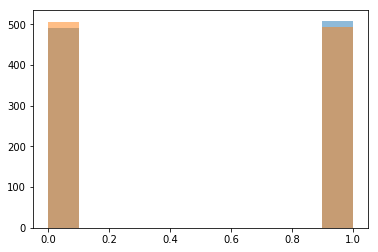

[[0 1 1 1 1 0 1 1 0 1]
 [0 0 1 1 0 0 1 0 1 0]
 [1 0 0 0 0 0 1 1 0 1]
 [0 0 1 0 1 1 0 0 0 0]
 [1 0 1 0 1 1 1 0 1 0]
 [1 1 1 1 0 0 0 0 1 0]
 [0 1 0 0 1 1 1 1 1 1]
 [1 1 1 1 0 0 0 0 1 0]
 [1 1 1 0 1 1 0 0 1 1]
 [0 1 1 0 1 1 1 1 1 1]
 [1 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 1 1 1 0 0 1]
 [0 0 1 1 0 0 1 0 1 1]
 [0 1 1 0 0 0 0 1 0 1]
 [0 1 0 1 0 1 1 1 1 0]
 [0 1 0 0 0 1 1 1 1 1]
 [0 0 0 1 1 0 0 1 0 0]
 [0 1 1 0 0 0 0 0 0 1]
 [1 0 1 0 0 1 1 0 1 0]
 [1 0 0 1 1 0 1 1 0 1]
 [0 0 0 1 0 1 0 1 0 1]
 [0 0 0 1 0 1 0 1 0 1]
 [0 1 0 0 1 1 1 0 0 0]
 [0 1 1 1 1 0 0 1 0 1]
 [1 1 1 1 0 1 1 0 1 1]
 [0 0 1 1 0 0 0 0 0 0]
 [1 0 0 1 1 0 1 1 1 1]
 [1 0 0 1 0 0 0 1 1 0]
 [1 0 1 1 1 0 0 0 1 1]
 [1 1 0 0 1 0 0 1 1 1]
 [0 1 0 0 1 0 1 0 1 1]
 [1 0 1 0 0 1 0 1 1 0]
 [1 0 0 0 0 1 1 1 1 1]
 [1 0 1 0 0 1 0 1 1 0]
 [1 1 0 1 0 0 0 1 1 1]
 [1 1 0 0 1 1 0 1 0 1]
 [0 1 0 1 0 0 1 0 1 1]
 [1 1 0 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 1 0 1 1]
 [1 0 1 1 1 1 0 0 1 1]
 [0 1 1 1 1 1 0 0 0 1]
 [1 1 0 0 0 0 1 1 1 0]
 [0 1 0 0 1 1 0 1 1 0]
 [1 1 1 1 1

[1 0 0 0 0 0 0 0 0 0] [0 0 0 1 1 1 1 0 0 0] = 0.0
[1 0 0 0 0 0 0 0 0 0] [1 0 1 1 1 1 0 0 0 1] = 1.0
[1 0 0 0 0 0 0 0 0 0] [1 1 1 1 0 1 1 0 1 0] = 1.0
[1 0 0 0 0 0 0 0 0 0] [0 0 1 1 0 0 0 0 1 1] = 0.0
[1 0 0 0 0 0 0 0 0 0] [1 1 0 0 0 0 0 0 1 0] = 1.0
[1 0 0 0 0 0 0 0 0 0] [0 0 1 1 0 0 1 0 0 0] = 0.0
[1 0 0 0 0 0 0 0 0 0] [1 0 1 0 1 0 1 1 0 1] = 1.0
[1 0 0 0 0 0 0 0 0 0] [1 0 1 0 0 1 0 0 1 1] = 1.0
[1 0 0 0 0 0 0 0 0 0] [1 1 0 0 0 0 1 1 0 0] = 1.0
[0 1 0 0 0 1 1 0 0 1] [0 1 1 1 1 0 1 1 0 1] = 3.0
[0 1 0 0 0 1 1 0 0 1] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 1 0 0 0 1 1 0 0 1] [1 0 0 0 0 0 1 1 0 1] = 2.0
[0 1 0 0 0 1 1 0 0 1] [0 0 1 0 1 1 0 0 0 0] = 1.0
[0 1 0 0 0 1 1 0 0 1] [1 0 1 0 1 1 1 0 1 0] = 2.0
[0 1 0 0 0 1 1 0 0 1] [1 1 1 1 0 0 0 0 1 0] = 1.0
[0 1 0 0 0 1 1 0 0 1] [0 1 0 0 1 1 1 1 1 1] = 4.0
[0 1 0 0 0 1 1 0 0 1] [1 1 1 1 0 0 0 0 1 0] = 1.0
[0 1 0 0 0 1 1 0 0 1] [1 1 1 0 1 1 0 0 1 1] = 3.0
[0 1 0 0 0 1 1 0 0 1] [0 1 1 0 1 1 1 1 1 1] = 4.0
[0 1 0 0 0 1 1 0 0 1] [1 0 1 0 1 1 0 1 1 0] = 1.0


[0 1 0 1 0 0 1 1 1 1] [1 1 0 1 0 1 0 1 1 1] = 5.0
[0 1 0 1 0 0 1 1 1 1] [0 0 0 1 0 0 1 1 1 0] = 4.0
[0 1 0 1 0 0 1 1 1 1] [0 0 1 1 1 0 0 0 1 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [1 0 0 0 0 0 0 1 1 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [0 0 1 1 0 0 0 0 1 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [1 0 0 1 0 1 1 1 1 1] = 5.0
[0 1 0 1 0 0 1 1 1 1] [0 1 0 1 0 1 1 0 0 1] = 4.0
[0 1 0 1 0 0 1 1 1 1] [0 0 1 1 0 1 1 0 0 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [1 1 1 1 1 0 0 1 1 1] = 5.0
[0 1 0 1 0 0 1 1 1 1] [1 1 1 0 1 0 1 1 1 0] = 4.0
[0 1 0 1 0 0 1 1 1 1] [0 1 1 1 1 1 1 0 0 1] = 4.0
[0 1 0 1 0 0 1 1 1 1] [1 1 1 1 0 0 1 0 1 1] = 5.0
[0 1 0 1 0 0 1 1 1 1] [1 0 1 1 1 1 0 1 0 0] = 2.0
[0 1 0 1 0 0 1 1 1 1] [0 0 0 0 1 1 0 1 0 0] = 1.0
[0 1 0 1 0 0 1 1 1 1] [1 1 1 0 0 0 1 1 0 1] = 4.0
[0 1 0 1 0 0 1 1 1 1] [1 0 1 0 1 0 1 0 1 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [1 0 0 1 1 0 0 1 1 0] = 3.0
[0 1 0 1 0 0 1 1 1 1] [1 1 0 1 0 0 1 1 0 1] = 5.0
[0 1 0 1 0 0 1 1 1 1] [1 1 0 0 1 1 1 0 0 1] = 3.0
[0 1 0 1 0 0 1 1 1 1] [0 1 1 1 0 1 1 1 0 0] = 4.0


[1 1 0 1 0 0 0 0 0 0] [0 0 0 1 1 1 1 0 0 0] = 1.0
[1 1 0 1 0 0 0 0 0 0] [1 0 1 1 1 1 0 0 0 1] = 2.0
[1 1 0 1 0 0 0 0 0 0] [1 1 1 1 0 1 1 0 1 0] = 3.0
[1 1 0 1 0 0 0 0 0 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[1 1 0 1 0 0 0 0 0 0] [1 1 0 0 0 0 0 0 1 0] = 2.0
[1 1 0 1 0 0 0 0 0 0] [0 0 1 1 0 0 1 0 0 0] = 1.0
[1 1 0 1 0 0 0 0 0 0] [1 0 1 0 1 0 1 1 0 1] = 1.0
[1 1 0 1 0 0 0 0 0 0] [1 0 1 0 0 1 0 0 1 1] = 1.0
[1 1 0 1 0 0 0 0 0 0] [1 1 0 0 0 0 1 1 0 0] = 2.0
[1 0 1 0 0 1 1 1 1 1] [0 1 1 1 1 0 1 1 0 1] = 4.0
[1 0 1 0 0 1 1 1 1 1] [0 0 1 1 0 0 1 0 1 0] = 3.0
[1 0 1 0 0 1 1 1 1 1] [1 0 0 0 0 0 1 1 0 1] = 4.0
[1 0 1 0 0 1 1 1 1 1] [0 0 1 0 1 1 0 0 0 0] = 2.0
[1 0 1 0 0 1 1 1 1 1] [1 0 1 0 1 1 1 0 1 0] = 5.0
[1 0 1 0 0 1 1 1 1 1] [1 1 1 1 0 0 0 0 1 0] = 3.0
[1 0 1 0 0 1 1 1 1 1] [0 1 0 0 1 1 1 1 1 1] = 5.0
[1 0 1 0 0 1 1 1 1 1] [1 1 1 1 0 0 0 0 1 0] = 3.0
[1 0 1 0 0 1 1 1 1 1] [1 1 1 0 1 1 0 0 1 1] = 5.0
[1 0 1 0 0 1 1 1 1 1] [0 1 1 0 1 1 1 1 1 1] = 6.0
[1 0 1 0 0 1 1 1 1 1] [1 0 1 0 1 1 0 1 1 0] = 5.0


[1 0 0 1 0 0 1 0 0 0] [0 0 0 1 1 1 1 0 0 0] = 2.0
[1 0 0 1 0 0 1 0 0 0] [1 0 1 1 1 1 0 0 0 1] = 2.0
[1 0 0 1 0 0 1 0 0 0] [1 1 1 1 0 1 1 0 1 0] = 3.0
[1 0 0 1 0 0 1 0 0 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[1 0 0 1 0 0 1 0 0 0] [1 1 0 0 0 0 0 0 1 0] = 1.0
[1 0 0 1 0 0 1 0 0 0] [0 0 1 1 0 0 1 0 0 0] = 2.0
[1 0 0 1 0 0 1 0 0 0] [1 0 1 0 1 0 1 1 0 1] = 2.0
[1 0 0 1 0 0 1 0 0 0] [1 0 1 0 0 1 0 0 1 1] = 1.0
[1 0 0 1 0 0 1 0 0 0] [1 1 0 0 0 0 1 1 0 0] = 2.0
[0 1 1 0 0 1 0 0 1 1] [0 1 1 1 1 0 1 1 0 1] = 3.0
[0 1 1 0 0 1 0 0 1 1] [0 0 1 1 0 0 1 0 1 0] = 2.0
[0 1 1 0 0 1 0 0 1 1] [1 0 0 0 0 0 1 1 0 1] = 1.0
[0 1 1 0 0 1 0 0 1 1] [0 0 1 0 1 1 0 0 0 0] = 2.0
[0 1 1 0 0 1 0 0 1 1] [1 0 1 0 1 1 1 0 1 0] = 3.0
[0 1 1 0 0 1 0 0 1 1] [1 1 1 1 0 0 0 0 1 0] = 3.0
[0 1 1 0 0 1 0 0 1 1] [0 1 0 0 1 1 1 1 1 1] = 4.0
[0 1 1 0 0 1 0 0 1 1] [1 1 1 1 0 0 0 0 1 0] = 3.0
[0 1 1 0 0 1 0 0 1 1] [1 1 1 0 1 1 0 0 1 1] = 5.0
[0 1 1 0 0 1 0 0 1 1] [0 1 1 0 1 1 1 1 1 1] = 5.0
[0 1 1 0 0 1 0 0 1 1] [1 0 1 0 1 1 0 1 1 0] = 3.0


[1 0 0 1 0 0 1 0 1 1] [1 1 0 0 0 0 1 1 0 0] = 2.0
[0 1 0 0 1 0 1 0 1 1] [0 1 1 1 1 0 1 1 0 1] = 4.0
[0 1 0 0 1 0 1 0 1 1] [0 0 1 1 0 0 1 0 1 0] = 2.0
[0 1 0 0 1 0 1 0 1 1] [1 0 0 0 0 0 1 1 0 1] = 2.0
[0 1 0 0 1 0 1 0 1 1] [0 0 1 0 1 1 0 0 0 0] = 1.0
[0 1 0 0 1 0 1 0 1 1] [1 0 1 0 1 1 1 0 1 0] = 3.0
[0 1 0 0 1 0 1 0 1 1] [1 1 1 1 0 0 0 0 1 0] = 2.0
[0 1 0 0 1 0 1 0 1 1] [0 1 0 0 1 1 1 1 1 1] = 5.0
[0 1 0 0 1 0 1 0 1 1] [1 1 1 1 0 0 0 0 1 0] = 2.0
[0 1 0 0 1 0 1 0 1 1] [1 1 1 0 1 1 0 0 1 1] = 4.0
[0 1 0 0 1 0 1 0 1 1] [0 1 1 0 1 1 1 1 1 1] = 5.0
[0 1 0 0 1 0 1 0 1 1] [1 0 1 0 1 1 0 1 1 0] = 2.0
[0 1 0 0 1 0 1 0 1 1] [1 0 0 0 1 1 1 0 0 1] = 3.0
[0 1 0 0 1 0 1 0 1 1] [0 0 1 1 0 0 1 0 1 1] = 3.0
[0 1 0 0 1 0 1 0 1 1] [0 1 1 0 0 0 0 1 0 1] = 2.0
[0 1 0 0 1 0 1 0 1 1] [0 1 0 1 0 1 1 1 1 0] = 3.0
[0 1 0 0 1 0 1 0 1 1] [0 1 0 0 0 1 1 1 1 1] = 4.0
[0 1 0 0 1 0 1 0 1 1] [0 0 0 1 1 0 0 1 0 0] = 1.0
[0 1 0 0 1 0 1 0 1 1] [0 1 1 0 0 0 0 0 0 1] = 2.0
[0 1 0 0 1 0 1 0 1 1] [1 0 1 0 0 1 1 0 1 0] = 2.0


[1 0 1 0 1 1 1 0 0 0] [0 0 0 1 1 1 1 0 0 0] = 3.0
[1 0 1 0 1 1 1 0 0 0] [1 0 1 1 1 1 0 0 0 1] = 4.0
[1 0 1 0 1 1 1 0 0 0] [1 1 1 1 0 1 1 0 1 0] = 4.0
[1 0 1 0 1 1 1 0 0 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[1 0 1 0 1 1 1 0 0 0] [1 1 0 0 0 0 0 0 1 0] = 1.0
[1 0 1 0 1 1 1 0 0 0] [0 0 1 1 0 0 1 0 0 0] = 2.0
[1 0 1 0 1 1 1 0 0 0] [1 0 1 0 1 0 1 1 0 1] = 4.0
[1 0 1 0 1 1 1 0 0 0] [1 0 1 0 0 1 0 0 1 1] = 3.0
[1 0 1 0 1 1 1 0 0 0] [1 1 0 0 0 0 1 1 0 0] = 2.0
[1 0 0 1 0 0 0 0 0 0] [0 1 1 1 1 0 1 1 0 1] = 1.0
[1 0 0 1 0 0 0 0 0 0] [0 0 1 1 0 0 1 0 1 0] = 1.0
[1 0 0 1 0 0 0 0 0 0] [1 0 0 0 0 0 1 1 0 1] = 1.0
[1 0 0 1 0 0 0 0 0 0] [0 0 1 0 1 1 0 0 0 0] = 0.0
[1 0 0 1 0 0 0 0 0 0] [1 0 1 0 1 1 1 0 1 0] = 1.0
[1 0 0 1 0 0 0 0 0 0] [1 1 1 1 0 0 0 0 1 0] = 2.0
[1 0 0 1 0 0 0 0 0 0] [0 1 0 0 1 1 1 1 1 1] = 0.0
[1 0 0 1 0 0 0 0 0 0] [1 1 1 1 0 0 0 0 1 0] = 2.0
[1 0 0 1 0 0 0 0 0 0] [1 1 1 0 1 1 0 0 1 1] = 1.0
[1 0 0 1 0 0 0 0 0 0] [0 1 1 0 1 1 1 1 1 1] = 0.0
[1 0 0 1 0 0 0 0 0 0] [1 0 1 0 1 1 0 1 1 0] = 1.0


[0 0 0 0 1 1 1 1 1 0] [1 0 1 1 0 0 0 0 0 1] = 0.0
[0 0 0 0 1 1 1 1 1 0] [0 0 0 1 1 1 1 0 0 0] = 3.0
[0 0 0 0 1 1 1 1 1 0] [1 0 1 1 1 1 0 0 0 1] = 2.0
[0 0 0 0 1 1 1 1 1 0] [1 1 1 1 0 1 1 0 1 0] = 3.0
[0 0 0 0 1 1 1 1 1 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[0 0 0 0 1 1 1 1 1 0] [1 1 0 0 0 0 0 0 1 0] = 1.0
[0 0 0 0 1 1 1 1 1 0] [0 0 1 1 0 0 1 0 0 0] = 1.0
[0 0 0 0 1 1 1 1 1 0] [1 0 1 0 1 0 1 1 0 1] = 3.0
[0 0 0 0 1 1 1 1 1 0] [1 0 1 0 0 1 0 0 1 1] = 2.0
[0 0 0 0 1 1 1 1 1 0] [1 1 0 0 0 0 1 1 0 0] = 2.0
[0 0 0 0 0 0 1 1 0 0] [0 1 1 1 1 0 1 1 0 1] = 2.0
[0 0 0 0 0 0 1 1 0 0] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 0 0 0 0 0 1 1 0 0] [1 0 0 0 0 0 1 1 0 1] = 2.0
[0 0 0 0 0 0 1 1 0 0] [0 0 1 0 1 1 0 0 0 0] = 0.0
[0 0 0 0 0 0 1 1 0 0] [1 0 1 0 1 1 1 0 1 0] = 1.0
[0 0 0 0 0 0 1 1 0 0] [1 1 1 1 0 0 0 0 1 0] = 0.0
[0 0 0 0 0 0 1 1 0 0] [0 1 0 0 1 1 1 1 1 1] = 2.0
[0 0 0 0 0 0 1 1 0 0] [1 1 1 1 0 0 0 0 1 0] = 0.0
[0 0 0 0 0 0 1 1 0 0] [1 1 1 0 1 1 0 0 1 1] = 0.0
[0 0 0 0 0 0 1 1 0 0] [0 1 1 0 1 1 1 1 1 1] = 2.0


[0 1 1 0 0 0 1 0 0 0] [0 1 0 0 0 1 1 1 1 1] = 2.0
[0 1 1 0 0 0 1 0 0 0] [0 0 0 1 1 0 0 1 0 0] = 0.0
[0 1 1 0 0 0 1 0 0 0] [0 1 1 0 0 0 0 0 0 1] = 2.0
[0 1 1 0 0 0 1 0 0 0] [1 0 1 0 0 1 1 0 1 0] = 2.0
[0 1 1 0 0 0 1 0 0 0] [1 0 0 1 1 0 1 1 0 1] = 1.0
[0 1 1 0 0 0 1 0 0 0] [0 0 0 1 0 1 0 1 0 1] = 0.0
[0 1 1 0 0 0 1 0 0 0] [0 0 0 1 0 1 0 1 0 1] = 0.0
[0 1 1 0 0 0 1 0 0 0] [0 1 0 0 1 1 1 0 0 0] = 2.0
[0 1 1 0 0 0 1 0 0 0] [0 1 1 1 1 0 0 1 0 1] = 2.0
[0 1 1 0 0 0 1 0 0 0] [1 1 1 1 0 1 1 0 1 1] = 3.0
[0 1 1 0 0 0 1 0 0 0] [0 0 1 1 0 0 0 0 0 0] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 0 0 1 1 0 1 1 1 1] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 0 0 1 0 0 0 1 1 0] = 0.0
[0 1 1 0 0 0 1 0 0 0] [1 0 1 1 1 0 0 0 1 1] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 1 0 0 1 0 0 1 1 1] = 1.0
[0 1 1 0 0 0 1 0 0 0] [0 1 0 0 1 0 1 0 1 1] = 2.0
[0 1 1 0 0 0 1 0 0 0] [1 0 1 0 0 1 0 1 1 0] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 0 0 0 0 1 1 1 1 1] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 0 1 0 0 1 0 1 1 0] = 1.0
[0 1 1 0 0 0 1 0 0 0] [1 1 0 1 0 0 0 1 1 1] = 1.0


[0 1 1 1 1 1 0 0 0 1] [1 1 0 1 0 0 0 1 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 1] [1 1 0 0 1 1 0 1 0 1] = 4.0
[0 1 1 1 1 1 0 0 0 1] [0 1 0 1 0 0 1 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 1] [1 1 0 1 0 0 0 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 1] [0 0 1 0 0 0 1 0 1 1] = 2.0
[0 1 1 1 1 1 0 0 0 1] [1 0 1 1 1 1 0 0 1 1] = 5.0
[0 1 1 1 1 1 0 0 0 1] [0 1 1 1 1 1 0 0 0 1] = 6.0
[0 1 1 1 1 1 0 0 0 1] [1 1 0 0 0 0 1 1 1 0] = 1.0
[0 1 1 1 1 1 0 0 0 1] [0 1 0 0 1 1 0 1 1 0] = 3.0
[0 1 1 1 1 1 0 0 0 1] [1 1 1 1 1 0 0 1 0 1] = 5.0
[0 1 1 1 1 1 0 0 0 1] [0 0 0 0 0 1 1 0 1 0] = 1.0
[0 1 1 1 1 1 0 0 0 1] [0 0 0 0 1 0 1 0 0 0] = 1.0
[0 1 1 1 1 1 0 0 0 1] [1 0 0 1 0 1 0 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 1] [1 1 1 0 1 0 0 1 0 1] = 4.0
[0 1 1 1 1 1 0 0 0 1] [1 1 0 0 0 1 0 1 0 1] = 3.0
[0 1 1 1 1 1 0 0 0 1] [0 0 0 1 1 0 1 1 0 0] = 2.0
[0 1 1 1 1 1 0 0 0 1] [0 1 0 1 1 0 0 1 1 0] = 3.0
[0 1 1 1 1 1 0 0 0 1] [1 1 0 0 1 0 0 1 0 0] = 2.0
[0 1 1 1 1 1 0 0 0 1] [0 1 1 0 1 0 0 0 0 0] = 3.0
[0 1 1 1 1 1 0 0 0 1] [0 1 1 0 0 0 0 0 1 0] = 2.0


[1 1 0 1 1 0 1 0 0 1] [1 0 1 0 1 0 1 0 1 1] = 4.0
[1 1 0 1 1 0 1 0 0 1] [1 0 0 1 1 0 0 1 1 0] = 3.0
[1 1 0 1 1 0 1 0 0 1] [1 1 0 1 0 0 1 1 0 1] = 5.0
[1 1 0 1 1 0 1 0 0 1] [1 1 0 0 1 1 1 0 0 1] = 5.0
[1 1 0 1 1 0 1 0 0 1] [0 1 1 1 0 1 1 1 0 0] = 3.0
[1 1 0 1 1 0 1 0 0 1] [1 0 0 0 0 0 1 1 0 1] = 3.0
[1 1 0 1 1 0 1 0 0 1] [0 0 1 1 0 0 1 0 0 0] = 2.0
[1 1 0 1 1 0 1 0 0 1] [0 1 0 1 0 0 0 0 0 1] = 3.0
[1 1 0 1 1 0 1 0 0 1] [1 0 0 1 1 0 0 0 0 1] = 4.0
[1 1 0 1 1 0 1 0 0 1] [0 0 0 1 0 1 1 0 1 0] = 2.0
[1 1 0 1 1 0 1 0 0 1] [0 0 1 0 1 0 1 1 1 0] = 2.0
[1 1 0 1 1 0 1 0 0 1] [0 1 1 0 0 1 0 1 1 1] = 2.0
[1 1 0 1 1 0 1 0 0 1] [1 0 1 1 0 0 0 0 0 1] = 3.0
[1 1 0 1 1 0 1 0 0 1] [0 0 0 1 1 1 1 0 0 0] = 3.0
[1 1 0 1 1 0 1 0 0 1] [1 0 1 1 1 1 0 0 0 1] = 4.0
[1 1 0 1 1 0 1 0 0 1] [1 1 1 1 0 1 1 0 1 0] = 4.0
[1 1 0 1 1 0 1 0 0 1] [0 0 1 1 0 0 0 0 1 1] = 2.0
[1 1 0 1 1 0 1 0 0 1] [1 1 0 0 0 0 0 0 1 0] = 2.0
[1 1 0 1 1 0 1 0 0 1] [0 0 1 1 0 0 1 0 0 0] = 2.0
[1 1 0 1 1 0 1 0 0 1] [1 0 1 0 1 0 1 1 0 1] = 4.0


[0 1 1 1 1 0 0 0 0 1] [1 0 1 0 1 1 0 1 1 0] = 2.0
[0 1 1 1 1 0 0 0 0 1] [1 0 0 0 1 1 1 0 0 1] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 0 1 1 0 0 1 0 1 1] = 3.0
[0 1 1 1 1 0 0 0 0 1] [0 1 1 0 0 0 0 1 0 1] = 3.0
[0 1 1 1 1 0 0 0 0 1] [0 1 0 1 0 1 1 1 1 0] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 1 0 0 0 1 1 1 1 1] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 0 0 1 1 0 0 1 0 0] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 1 1 0 0 0 0 0 0 1] = 3.0
[0 1 1 1 1 0 0 0 0 1] [1 0 1 0 0 1 1 0 1 0] = 1.0
[0 1 1 1 1 0 0 0 0 1] [1 0 0 1 1 0 1 1 0 1] = 3.0
[0 1 1 1 1 0 0 0 0 1] [0 0 0 1 0 1 0 1 0 1] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 0 0 1 0 1 0 1 0 1] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 1 0 0 1 1 1 0 0 0] = 2.0
[0 1 1 1 1 0 0 0 0 1] [0 1 1 1 1 0 0 1 0 1] = 5.0
[0 1 1 1 1 0 0 0 0 1] [1 1 1 1 0 1 1 0 1 1] = 4.0
[0 1 1 1 1 0 0 0 0 1] [0 0 1 1 0 0 0 0 0 0] = 2.0
[0 1 1 1 1 0 0 0 0 1] [1 0 0 1 1 0 1 1 1 1] = 3.0
[0 1 1 1 1 0 0 0 0 1] [1 0 0 1 0 0 0 1 1 0] = 1.0
[0 1 1 1 1 0 0 0 0 1] [1 0 1 1 1 0 0 0 1 1] = 4.0
[0 1 1 1 1 0 0 0 0 1] [1 1 0 0 1 0 0 1 1 1] = 3.0


[0 1 0 1 0 1 0 1 0 0] [0 0 1 1 1 0 0 0 1 1] = 1.0
[0 1 0 1 0 1 0 1 0 0] [1 0 0 0 0 0 0 1 1 1] = 1.0
[0 1 0 1 0 1 0 1 0 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[0 1 0 1 0 1 0 1 0 0] [1 0 0 1 0 1 1 1 1 1] = 3.0
[0 1 0 1 0 1 0 1 0 0] [0 1 0 1 0 1 1 0 0 1] = 3.0
[0 1 0 1 0 1 0 1 0 0] [0 0 1 1 0 1 1 0 0 1] = 2.0
[0 1 0 1 0 1 0 1 0 0] [1 1 1 1 1 0 0 1 1 1] = 3.0
[0 1 0 1 0 1 0 1 0 0] [1 1 1 0 1 0 1 1 1 0] = 2.0
[0 1 0 1 0 1 0 1 0 0] [0 1 1 1 1 1 1 0 0 1] = 3.0
[0 1 0 1 0 1 0 1 0 0] [1 1 1 1 0 0 1 0 1 1] = 2.0
[0 1 0 1 0 1 0 1 0 0] [1 0 1 1 1 1 0 1 0 0] = 3.0
[0 1 0 1 0 1 0 1 0 0] [0 0 0 0 1 1 0 1 0 0] = 2.0
[0 1 0 1 0 1 0 1 0 0] [1 1 1 0 0 0 1 1 0 1] = 2.0
[0 1 0 1 0 1 0 1 0 0] [1 0 1 0 1 0 1 0 1 1] = 0.0
[0 1 0 1 0 1 0 1 0 0] [1 0 0 1 1 0 0 1 1 0] = 2.0
[0 1 0 1 0 1 0 1 0 0] [1 1 0 1 0 0 1 1 0 1] = 3.0
[0 1 0 1 0 1 0 1 0 0] [1 1 0 0 1 1 1 0 0 1] = 2.0
[0 1 0 1 0 1 0 1 0 0] [0 1 1 1 0 1 1 1 0 0] = 4.0
[0 1 0 1 0 1 0 1 0 0] [1 0 0 0 0 0 1 1 0 1] = 1.0
[0 1 0 1 0 1 0 1 0 0] [0 0 1 1 0 0 1 0 0 0] = 1.0


[0 1 0 1 1 1 0 0 1 0] [0 0 1 1 1 0 0 0 1 1] = 3.0
[0 1 0 1 1 1 0 0 1 0] [1 0 0 0 0 0 0 1 1 1] = 1.0
[0 1 0 1 1 1 0 0 1 0] [0 0 1 1 0 0 0 0 1 1] = 2.0
[0 1 0 1 1 1 0 0 1 0] [1 0 0 1 0 1 1 1 1 1] = 3.0
[0 1 0 1 1 1 0 0 1 0] [0 1 0 1 0 1 1 0 0 1] = 3.0
[0 1 0 1 1 1 0 0 1 0] [0 0 1 1 0 1 1 0 0 1] = 2.0
[0 1 0 1 1 1 0 0 1 0] [1 1 1 1 1 0 0 1 1 1] = 4.0
[0 1 0 1 1 1 0 0 1 0] [1 1 1 0 1 0 1 1 1 0] = 3.0
[0 1 0 1 1 1 0 0 1 0] [0 1 1 1 1 1 1 0 0 1] = 4.0
[0 1 0 1 1 1 0 0 1 0] [1 1 1 1 0 0 1 0 1 1] = 3.0
[0 1 0 1 1 1 0 0 1 0] [1 0 1 1 1 1 0 1 0 0] = 3.0
[0 1 0 1 1 1 0 0 1 0] [0 0 0 0 1 1 0 1 0 0] = 2.0
[0 1 0 1 1 1 0 0 1 0] [1 1 1 0 0 0 1 1 0 1] = 1.0
[0 1 0 1 1 1 0 0 1 0] [1 0 1 0 1 0 1 0 1 1] = 2.0
[0 1 0 1 1 1 0 0 1 0] [1 0 0 1 1 0 0 1 1 0] = 3.0
[0 1 0 1 1 1 0 0 1 0] [1 1 0 1 0 0 1 1 0 1] = 2.0
[0 1 0 1 1 1 0 0 1 0] [1 1 0 0 1 1 1 0 0 1] = 3.0
[0 1 0 1 1 1 0 0 1 0] [0 1 1 1 0 1 1 1 0 0] = 3.0
[0 1 0 1 1 1 0 0 1 0] [1 0 0 0 0 0 1 1 0 1] = 0.0
[0 1 0 1 1 1 0 0 1 0] [0 0 1 1 0 0 1 0 0 0] = 1.0


[1 1 0 0 1 0 0 1 0 1] [0 1 0 1 0 0 0 0 0 1] = 2.0
[1 1 0 0 1 0 0 1 0 1] [1 0 0 1 1 0 0 0 0 1] = 3.0
[1 1 0 0 1 0 0 1 0 1] [0 0 0 1 0 1 1 0 1 0] = 0.0
[1 1 0 0 1 0 0 1 0 1] [0 0 1 0 1 0 1 1 1 0] = 2.0
[1 1 0 0 1 0 0 1 0 1] [0 1 1 0 0 1 0 1 1 1] = 3.0
[1 1 0 0 1 0 0 1 0 1] [1 0 1 1 0 0 0 0 0 1] = 2.0
[1 1 0 0 1 0 0 1 0 1] [0 0 0 1 1 1 1 0 0 0] = 1.0
[1 1 0 0 1 0 0 1 0 1] [1 0 1 1 1 1 0 0 0 1] = 3.0
[1 1 0 0 1 0 0 1 0 1] [1 1 1 1 0 1 1 0 1 0] = 2.0
[1 1 0 0 1 0 0 1 0 1] [0 0 1 1 0 0 0 0 1 1] = 1.0
[1 1 0 0 1 0 0 1 0 1] [1 1 0 0 0 0 0 0 1 0] = 2.0
[1 1 0 0 1 0 0 1 0 1] [0 0 1 1 0 0 1 0 0 0] = 0.0
[1 1 0 0 1 0 0 1 0 1] [1 0 1 0 1 0 1 1 0 1] = 4.0
[1 1 0 0 1 0 0 1 0 1] [1 0 1 0 0 1 0 0 1 1] = 2.0
[1 1 0 0 1 0 0 1 0 1] [1 1 0 0 0 0 1 1 0 0] = 3.0
[1 1 1 0 0 0 0 1 1 0] [0 1 1 1 1 0 1 1 0 1] = 3.0
[1 1 1 0 0 0 0 1 1 0] [0 0 1 1 0 0 1 0 1 0] = 2.0
[1 1 1 0 0 0 0 1 1 0] [1 0 0 0 0 0 1 1 0 1] = 2.0
[1 1 1 0 0 0 0 1 1 0] [0 0 1 0 1 1 0 0 0 0] = 1.0
[1 1 1 0 0 0 0 1 1 0] [1 0 1 0 1 1 1 0 1 0] = 3.0


[0 0 0 0 0 1 1 0 1 0] [0 1 1 0 0 1 0 1 1 1] = 2.0
[0 0 0 0 0 1 1 0 1 0] [1 0 1 1 0 0 0 0 0 1] = 0.0
[0 0 0 0 0 1 1 0 1 0] [0 0 0 1 1 1 1 0 0 0] = 2.0
[0 0 0 0 0 1 1 0 1 0] [1 0 1 1 1 1 0 0 0 1] = 1.0
[0 0 0 0 0 1 1 0 1 0] [1 1 1 1 0 1 1 0 1 0] = 3.0
[0 0 0 0 0 1 1 0 1 0] [0 0 1 1 0 0 0 0 1 1] = 1.0
[0 0 0 0 0 1 1 0 1 0] [1 1 0 0 0 0 0 0 1 0] = 1.0
[0 0 0 0 0 1 1 0 1 0] [0 0 1 1 0 0 1 0 0 0] = 1.0
[0 0 0 0 0 1 1 0 1 0] [1 0 1 0 1 0 1 1 0 1] = 1.0
[0 0 0 0 0 1 1 0 1 0] [1 0 1 0 0 1 0 0 1 1] = 2.0
[0 0 0 0 0 1 1 0 1 0] [1 1 0 0 0 0 1 1 0 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [0 1 1 1 1 0 1 1 0 1] = 2.0
[0 0 0 1 0 1 0 1 0 0] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [1 0 0 0 0 0 1 1 0 1] = 1.0
[0 0 0 1 0 1 0 1 0 0] [0 0 1 0 1 1 0 0 0 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [1 0 1 0 1 1 1 0 1 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [1 1 1 1 0 0 0 0 1 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [0 1 0 0 1 1 1 1 1 1] = 2.0
[0 0 0 1 0 1 0 1 0 0] [1 1 1 1 0 0 0 0 1 0] = 1.0
[0 0 0 1 0 1 0 1 0 0] [1 1 1 0 1 1 0 0 1 1] = 1.0


[1 1 0 1 1 0 0 1 0 1] [0 1 1 1 0 1 1 1 0 0] = 3.0
[1 1 0 1 1 0 0 1 0 1] [1 0 0 0 0 0 1 1 0 1] = 3.0
[1 1 0 1 1 0 0 1 0 1] [0 0 1 1 0 0 1 0 0 0] = 1.0
[1 1 0 1 1 0 0 1 0 1] [0 1 0 1 0 0 0 0 0 1] = 3.0
[1 1 0 1 1 0 0 1 0 1] [1 0 0 1 1 0 0 0 0 1] = 4.0
[1 1 0 1 1 0 0 1 0 1] [0 0 0 1 0 1 1 0 1 0] = 1.0
[1 1 0 1 1 0 0 1 0 1] [0 0 1 0 1 0 1 1 1 0] = 2.0
[1 1 0 1 1 0 0 1 0 1] [0 1 1 0 0 1 0 1 1 1] = 3.0
[1 1 0 1 1 0 0 1 0 1] [1 0 1 1 0 0 0 0 0 1] = 3.0
[1 1 0 1 1 0 0 1 0 1] [0 0 0 1 1 1 1 0 0 0] = 2.0
[1 1 0 1 1 0 0 1 0 1] [1 0 1 1 1 1 0 0 0 1] = 4.0
[1 1 0 1 1 0 0 1 0 1] [1 1 1 1 0 1 1 0 1 0] = 3.0
[1 1 0 1 1 0 0 1 0 1] [0 0 1 1 0 0 0 0 1 1] = 2.0
[1 1 0 1 1 0 0 1 0 1] [1 1 0 0 0 0 0 0 1 0] = 2.0
[1 1 0 1 1 0 0 1 0 1] [0 0 1 1 0 0 1 0 0 0] = 1.0
[1 1 0 1 1 0 0 1 0 1] [1 0 1 0 1 0 1 1 0 1] = 4.0
[1 1 0 1 1 0 0 1 0 1] [1 0 1 0 0 1 0 0 1 1] = 2.0
[1 1 0 1 1 0 0 1 0 1] [1 1 0 0 0 0 1 1 0 0] = 3.0
[0 1 1 1 0 1 1 1 1 1] [0 1 1 1 1 0 1 1 0 1] = 6.0
[0 1 1 1 0 1 1 1 1 1] [0 0 1 1 0 0 1 0 1 0] = 4.0


[1 0 0 0 1 1 0 0 1 0] [1 0 1 0 1 1 1 0 1 0] = 4.0
[1 0 0 0 1 1 0 0 1 0] [1 1 1 1 0 0 0 0 1 0] = 2.0
[1 0 0 0 1 1 0 0 1 0] [0 1 0 0 1 1 1 1 1 1] = 3.0
[1 0 0 0 1 1 0 0 1 0] [1 1 1 1 0 0 0 0 1 0] = 2.0
[1 0 0 0 1 1 0 0 1 0] [1 1 1 0 1 1 0 0 1 1] = 4.0
[1 0 0 0 1 1 0 0 1 0] [0 1 1 0 1 1 1 1 1 1] = 3.0
[1 0 0 0 1 1 0 0 1 0] [1 0 1 0 1 1 0 1 1 0] = 4.0
[1 0 0 0 1 1 0 0 1 0] [1 0 0 0 1 1 1 0 0 1] = 3.0
[1 0 0 0 1 1 0 0 1 0] [0 0 1 1 0 0 1 0 1 1] = 1.0
[1 0 0 0 1 1 0 0 1 0] [0 1 1 0 0 0 0 1 0 1] = 0.0
[1 0 0 0 1 1 0 0 1 0] [0 1 0 1 0 1 1 1 1 0] = 2.0
[1 0 0 0 1 1 0 0 1 0] [0 1 0 0 0 1 1 1 1 1] = 2.0
[1 0 0 0 1 1 0 0 1 0] [0 0 0 1 1 0 0 1 0 0] = 1.0
[1 0 0 0 1 1 0 0 1 0] [0 1 1 0 0 0 0 0 0 1] = 0.0
[1 0 0 0 1 1 0 0 1 0] [1 0 1 0 0 1 1 0 1 0] = 3.0
[1 0 0 0 1 1 0 0 1 0] [1 0 0 1 1 0 1 1 0 1] = 2.0
[1 0 0 0 1 1 0 0 1 0] [0 0 0 1 0 1 0 1 0 1] = 1.0
[1 0 0 0 1 1 0 0 1 0] [0 0 0 1 0 1 0 1 0 1] = 1.0
[1 0 0 0 1 1 0 0 1 0] [0 1 0 0 1 1 1 0 0 0] = 2.0
[1 0 0 0 1 1 0 0 1 0] [0 1 1 1 1 0 0 1 0 1] = 1.0


[1 0 1 0 0 0 0 0 1 1] [0 1 0 1 0 1 1 1 1 0] = 1.0
[1 0 1 0 0 0 0 0 1 1] [0 1 0 0 0 1 1 1 1 1] = 2.0
[1 0 1 0 0 0 0 0 1 1] [0 0 0 1 1 0 0 1 0 0] = 0.0
[1 0 1 0 0 0 0 0 1 1] [0 1 1 0 0 0 0 0 0 1] = 2.0
[1 0 1 0 0 0 0 0 1 1] [1 0 1 0 0 1 1 0 1 0] = 3.0
[1 0 1 0 0 0 0 0 1 1] [1 0 0 1 1 0 1 1 0 1] = 2.0
[1 0 1 0 0 0 0 0 1 1] [0 0 0 1 0 1 0 1 0 1] = 1.0
[1 0 1 0 0 0 0 0 1 1] [0 0 0 1 0 1 0 1 0 1] = 1.0
[1 0 1 0 0 0 0 0 1 1] [0 1 0 0 1 1 1 0 0 0] = 0.0
[1 0 1 0 0 0 0 0 1 1] [0 1 1 1 1 0 0 1 0 1] = 2.0
[1 0 1 0 0 0 0 0 1 1] [1 1 1 1 0 1 1 0 1 1] = 4.0
[1 0 1 0 0 0 0 0 1 1] [0 0 1 1 0 0 0 0 0 0] = 1.0
[1 0 1 0 0 0 0 0 1 1] [1 0 0 1 1 0 1 1 1 1] = 3.0
[1 0 1 0 0 0 0 0 1 1] [1 0 0 1 0 0 0 1 1 0] = 2.0
[1 0 1 0 0 0 0 0 1 1] [1 0 1 1 1 0 0 0 1 1] = 4.0
[1 0 1 0 0 0 0 0 1 1] [1 1 0 0 1 0 0 1 1 1] = 3.0
[1 0 1 0 0 0 0 0 1 1] [0 1 0 0 1 0 1 0 1 1] = 2.0
[1 0 1 0 0 0 0 0 1 1] [1 0 1 0 0 1 0 1 1 0] = 3.0
[1 0 1 0 0 0 0 0 1 1] [1 0 0 0 0 1 1 1 1 1] = 3.0
[1 0 1 0 0 0 0 0 1 1] [1 0 1 0 0 1 0 1 1 0] = 3.0


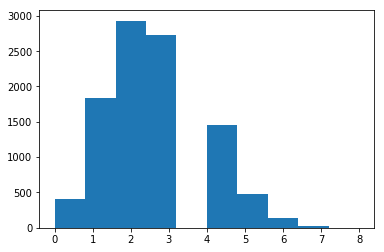

[5.0, 4.0, 2.0, 3.0, 5.0, 3.0, 5.0, 3.0, 5.0, 6.0, 4.0, 4.0, 5.0, 2.0, 4.0, 4.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 3.0, 4.0, 6.0, 2.0, 5.0, 2.0, 5.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 6.0, 5.0, 2.0, 3.0, 4.0, 3.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 6.0, 5.0, 4.0, 2.0, 3.0, 5.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 5.0, 5.0, 4.0, 1.0, 3.0, 4.0, 4.0, 1.0, 5.0, 4.0, 4.0, 1.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 2.0, 2.0, 4.0, 5.0, 3.0, 3.0, 1.0, 4.0, 6.0, 2.0, 6.0, 4.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.0, 2.0, 5.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 4.0, 2.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 4.0, 6.0, 3.0, 4.0, 6.0, 5.0, 4.0, 6.0, 4.0, 1.0, 5.0, 5.0, 4.0, 5.0, 3.0, 4.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 5.0, 4.0, 2.0, 3.0, 5.0, 4.0, 3.0,

In [140]:
from scipy.stats import beta
# n_questions = 100
# n_students = 100
# n_factors = 2

def gen_run(n_movies, n_viewers, n_factors):
    from numpy.random import randint, uniform

    mina,maxa =(0,1)
    minb,maxb =(0,1)
    movies = randint(minb, maxb+1, size=(n_movies, n_factors))
    viewers = randint(mina, maxa+1, size=(n_viewers, n_factors))
#     movies =  beta.rvs(2, 2, size=(n_movies, n_factors))
#     viewers = beta.rvs(2, 2, size=(n_movies, n_factors))

    plt.hist(movies.flatten(), alpha=0.5)
    plt.hist(viewers.flatten(), alpha=0.5)
    plt.show()
    
    print(movies)
    print(viewers)

    sig = lambda z : 1/(1+numpy.exp(-z))

    obs = numpy.zeros((len(viewers), len(movies)))
    #obs = numpy.matmul(viewers, movies.T)/n_factors
    vz = []
    mz = []
    scz =[]
    for vi in range(len(viewers)):
        for mi in range(len(movies)):
#             obs[vi,mi] = numpy.prod(sig(viewers[vi] - movies[mi]))
            obs[vi,mi] = numpy.dot(viewers[vi], movies[mi])
#             prxd = numpy.multiply(viewers[vi], movies[mi])
#             obs[vi,mi] = numpy.sum(prxd)
#             obs[vi,mi] = numpy.random.randint(0,2)
            print(viewers[vi], movies[mi],"=",obs[vi,mi])
    plt.hist(obs.flatten())
    plt.show()
    
    return obs, None, viewers, movies

numpy.set_printoptions(precision=3)
obs, _, sz_temp, qz_temp  = gen_run(n_students, n_questions, n_factors)

print([o for o in obs.flatten()])

In [5]:
from keras.regularizers import l1
from keras.layers import Dropout, multiply, subtract, GaussianNoise, GaussianDropout
from keras import backend as K
def generate_qs_model(qn_table, psi_table, optimiser):
    psi_sel = Input(shape=(1,), name="psi_select", dtype="int32")
    qn_sel = Input(shape=(1,), name="q_select", dtype="int32")
    print(qn_table, psi_table, psi_sel, qn_sel)
    print("psi_sel shape", psi_sel.shape)

    psi_table.trainable=True
    qn_table.trainable=True
    
    qn_row = qn_table(qn_sel)
#     qn_row = GaussianNoise(.5)(qn_row)
    psi_row = psi_table(psi_sel)
#     psi_row = GaussianNoise(0.5)(psi_row)
    
#     prds = multiply([qn_row, psi_row])
#     difs = subtract([psi_row, qn_row])
#     score = Lambda(lambda ps: K.sum(ps, keepdims=True)/n_factors, name="score")(prds)
#     Prs = Lambda(lambda z: (1.0 / (1.0 + K.exp(-z))), name="Pr_sigmoid1")(difs)
    
    score = Lambda(lambda qp: K.batch_dot(qp[0], qp[1], axes=1), name="dot_prod")([qn_row, psi_row])
    
#     score = Lambda(lambda ps: K.prod(ps, axis=1, keepdims=True), name="score")(Prs)
    
    model = Model(inputs=[qn_sel, psi_sel], outputs=score)
#     model.compile(optimizer=optimiser, loss="binary_crossentropy")
    model.compile(optimizer=optimiser, loss="mse")#, metrics=["accuracy"])

    print(model.summary())

    return model

In [ ]:
x = [.6, .7]
y = [.4, .5]
z = numpy.dot(x,y)
print(z)

In [ ]:
# from NN_utils import BigTable, WeightClip
# from keras.optimizers import Adam

# inv_sigmoid = lambda p: -numpy.log(1/p - 1)
# p50 = inv_sigmoid( 0.5**(1/n_factors) )

# s_table =  BigTable((n_viewers, n_factors), 0, 1, init_hilo=None)#, regulariser=regularizers.l2(10e-8))
# qn_table = BigTable((n_movies, n_factors), 0, 1, init_hilo=None)#, regulariser=regularizers.l2(10e-8))

# m = generate_qs_model(qn_table, s_table, Adam())

In [6]:
vz = []
mz = []
scz =[]
pz =[]

# frak = 12000/(n_movies*n_viewers)
# print(frak)

from collections import defaultdict

frak = 1
all_pairs = [(v,m) for v in range(n_viewers) for m in range(n_movies)]
pairs_to_use = all_pairs
if frak != 1:
    all_pair_ixs = list(range(len(all_pairs)))
    print(all_pairs[0:10])
    pairs_to_use = numpy.random.choice(all_pair_ixs, size=int(max(frak*len(all_pairs),10000)), replace=True)
    pairs_to_use = numpy.array(all_pairs)[pairs_to_use]

all_scz = []
for vi,mi in pairs_to_use:
        sc = numpy.sum(numpy.multiply(viewers[vi],movies[mi]))
        vz.append(vi)
        mz.append(mi)
        all_scz.append(sc)

del all_pairs
del pairs_to_use
    
all_ixs = range(len(all_scz))
val_ixs = numpy.random.choice(all_ixs, size=2*int(min(len(all_scz)/10,1000)), replace=False) #len(attempts)//100, replace=False)
trn_ixs = list(set(all_ixs) - set(val_ixs))
test_ixs = val_ixs[0:len(val_ixs)//2]
val_ixs = val_ixs[len(val_ixs)//2:]
        
all_vz = numpy.array(vz).reshape([-1,1])
all_mz = numpy.array(mz).reshape([-1,1])
all_scz = numpy.array(all_scz).reshape([-1,1])

vvz = all_vz[val_ixs]
vmz = all_mz[val_ixs]
vscz = all_scz[val_ixs]

tvz = all_vz[test_ixs]
tmz = all_mz[test_ixs]
tscz = all_scz[test_ixs]

vz = all_vz[trn_ixs]
mz = all_mz[trn_ixs]
scz = all_scz[trn_ixs]

NameError: name 'n_viewers' is not defined

len all_pfz 0


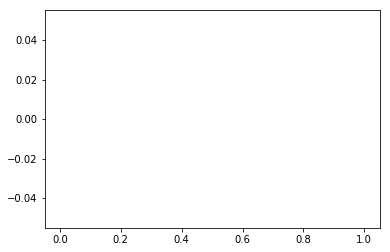

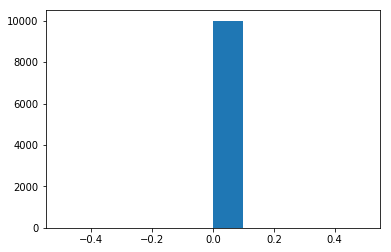

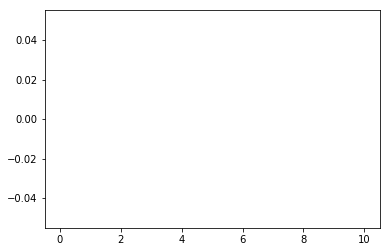

OBS SSHAPE (100, 100)
tvt: 10000 8000 1000
[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1

In [95]:
def tvt_split(sws, qws, obs, split_mode=3):
    all_sz = []
    all_qz = []
    all_pfz = []
    sig = lambda z : 1/(1+numpy.exp(-z))
#     obs = numpy.zeros((len(sws), len(qws)))
    probs = numpy.zeros((len(sws), len(qws)))
    #obs = numpy.matmul(viewers, movies.T)/n_factors
    vz = []
    mz = []
    scz =[]
    all_pfz=[]
    all_pairs = set()
    attempt_lookup = defaultdict(list)
    cts=[]
    for vi in range(len(sws)):
        for mi in range(len(qws)):
            for _ in range(1):
                all_pairs.add((vi,mi))
#                 zmask = (qws[mi]==-10).astype(int)
#                 sc = numpy.dot(sws[vi],qws[mi])
#                 prs = logistic(deltas,1,0)
#                 prs = numpy.maximum(zmask,prs)
#                 pr = numpy.prod(prs)
                ct=0

                all_sz.append(vi)
                all_qz.append(mi)

                rd = random.random()
#                     print(vi, mi, pr, rd)
#                 ob = (rd < pr)
#                 obs[vi,mi] = ob
#                 probs[vi,mi] = pr
#                 all_pfz.append(pr)
                sc = obs[vi,mi]
                attempt_lookup[(vi,mi)].append(sc)
    #             print(vi,mi, numpy.prod(prs))

    print("len all_pfz", len(all_pfz))
    plt.hist(all_pfz)
    plt.show()

    plt.hist(probs.flatten())
    plt.show()
    
    plt.hist(cts, range=[0,10])
    plt.show()

    print("OBS SSHAPE", obs.shape)

    frak=1
    all_pair_ixs = list(range(len(all_pairs)))
    # ixs_to_use = numpy.random.choice(all_pair_ixs, size=int(max(frak*len(all_pairs),10)), replace=True)
    # pairs_to_use = numpy.array(all_pairs)[ixs_to_use]

    all_ixs = all_pair_ixs
    
    val_ixs = numpy.random.choice(all_pair_ixs, size=1000, replace=False) #len(attempts)//100, replace=False)
    trn_ixs = list(set(all_ixs) - set(val_ixs))
    test_ixs = numpy.random.choice(trn_ixs, size=1000, replace=False) #len(attempts)//100, replace=False)
    trn_ixs = list(set(trn_ixs) - set(test_ixs))
    print("tvt:", len(all_ixs), len(trn_ixs), len(test_ixs))

#     all_sz = numpy.array(all_sz).reshape([-1,1])
#     all_qz = numpy.array(all_qz).reshape([-1,1])
#     all_pfz = numpy.array(all_pfz).reshape([-1,1])
#     print("len all_pfz", len(all_pfz))

    all_pairs = sorted(list(all_pairs))
    test_pairs = [all_pairs[ix] for ix in test_ixs]
    val_pairs = [all_pairs[ix] for ix in val_ixs]
    train_pairs = [all_pairs[ix] for ix in trn_ixs]
    
    tsz=[]
    tqz=[]
    tpfz=[]
    
    vsz=[]
    vqz=[]
    vpfz=[]
    
    sz=[]
    qz=[]
    pfz=[]
    
    for tp in test_pairs:
        scores = attempt_lookup[tp]
        for sc in scores:
            tsz.append(tp[0])
            tqz.append(tp[1])
            tpfz.append(sc)
    
    if split_mode==2:
        train_pairs = train_pairs + val_pairs
        val_pairs = []
    
    if split_mode==1:
        train_pairs = train_pairs + val_pairs + test_pairs
        test_pairs = []
        val_pairs = []
    
    for tp in val_pairs:
        scores = attempt_lookup[tp]
        for sc in scores:
            vsz.append(tp[0])
            vqz.append(tp[1])
            vpfz.append(sc)

    for tp in train_pairs:
        scores = attempt_lookup[tp]
        for sc in scores:
            sz.append(tp[0])
            qz.append(tp[1])
            pfz.append(sc)

    tsz=numpy.array(tsz)
    tqz=numpy.array(tqz)
    tpfz=numpy.array(tpfz)
    
    vsz=numpy.array(vsz)
    vqz=numpy.array(vqz)
    vpfz=numpy.array(vpfz)
    
    sz=numpy.array(sz)
    qz=numpy.array(qz)
    pfz=numpy.array(pfz)
    
    return (sz,qz,pfz), (vsz,vqz,vpfz), (tsz,tqz,tpfz), obs, probs
    
    
(vz,mz,pfz), (vsz,vqz,vpfz), (tsz,tqz,tpfz), obs, probs = tvt_split(sz_temp, qz_temp, obs, split_mode=1)
print([p for p in pfz])

In [ ]:
for vi,mi,sc in zip(vz,mz,all_scz):
    print(vi,mi,sc)

In [123]:
# sw = s_table.get_weights()[0]
# qw = qn_table.get_weights()[0]

# print(sw.shape)
# print(qw.shape)

# mm = numpy.dot(qw, sw.T)/n_factors
# # mm = numpy.sum(mm, axis=1)
# print(mm)

# wz = m.get_weights()
# s_table =  BigTable((n_students, n_factors), 6, 100, init_hilo=10)#, regulariser=regularizers.l1(10e-6))
# qn_table = BigTable((n_questions, n_factors), 0, 100, init_hilo=10-p50)#, regulariser=regularizers.l1(10e-6))
# qm = generate_qs_model(qn_table, s_table, Adam(), comp_lims=False, s_train=False, q_train=True)
# sm = generate_qs_model(qn_table, s_table, Adam(), comp_lims=False, s_train=True, q_train=False)
from keras import regularizers
n_students, n_questions = 100, 100
n_factors = 10
def generate_and_train(qz,sz,pfz, vqz,vsz,vpfz, w=n_factors):
#     s_table =  BigTable((n_students, w), -math.inf, math.inf, init_hilo=0.5)#, regulariser=regularizers.l2(10e-6))
#     qn_table = BigTable((n_questions, w), -math.inf, math.inf, init_hilo=0.5)#, regulariser=regularizers.l1(10e-6))
    s_table =  BigTable((n_students, w), 0, 10, init_hilo=5)#, regulariser=regularizers.l2(10e-6))
    qn_table = BigTable((n_questions, w), 0, 10, init_hilo=5)#, regulariser=regularizers.l1(10e-6))

    from keras.layers import Embedding
    from keras.constraints import NonNeg, MinMaxNorm
    from keras.initializers import RandomNormal, RandomUniform
    
#     wc=WeightClip(0,1)
    
    q_gates = None #Embedding(n_questions,w, input_length=1, embeddings_initializer=RandomUniform(minval=0, maxval=1, seed=None), embeddings_constraint=wc)
#     qn_table = Embedding(n_questions,w, input_length=1, embeddings_initializer=RandomNormal(mean=6, stddev=0.3))
#     s_table = Embedding(n_students,w, input_length=1, embeddings_constraint=WeightClip(0,math.inf), embeddings_initializer=RandomNormal(mean=6, stddev=0.3))
    
    from keras.optimizers import Adam
    from keras.callbacks import EarlyStopping
    m = generate_qs_model(qn_table, s_table, Adam())#, s_train=True, q_train=True)
    if vqz:
        lozz="val_loss"
    else:
        lozz="loss"
    es = EarlyStopping(monitor=lozz, restore_best_weights=True, patience=100)
    h = m.fit(x=[qz,sz], y=numpy.array(pfz).reshape(-1,1), batch_size=1000, shuffle=True, epochs=100000, verbose=1, callbacks=[es], validation_data=[[vqz,vsz], vpfz])
#     h = m.fit(x=[qz,sz], y=pfz.flatten(), batch_size=32, shuffle=True, epochs=1000, verbose=1, callbacks=[es], validation_data=[[vqz,vsz], vpfz])
    return s_table, qn_table, q_gates, m, h


In [116]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="loss", restore_best_weights=True, patience=10)
initpfz = [50 for _ in range(len(scz))]
m.fit(x=[mz,vz], y=pfz, batch_size=1000, shuffle=True, epochs=1000, verbose=1)#, callbacks=[es], validation_split=1000/len(initpfz))

Epoch 1/1000
10000/10000 [==============================] - 0s 2us/step - loss: 2256.1157
Epoch 2/1000
10000/10000 [==============================] - 0s 2us/step - loss: 2200.4108
Epoch 3/1000
10000/10000 [==============================] - 0s 2us/step - loss: 2125.5231
Epoch 4/1000
10000/10000 [==============================] - 0s 2us/step - loss: 2048.2144
Epoch 5/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1972.6211
Epoch 6/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1900.9214
Epoch 7/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1832.5480
Epoch 8/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1768.1604
Epoch 9/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1707.1696
Epoch 10/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1649.0650
Epoch 11/1000
10000/10000 [==============================] - 0s 2us/step - loss: 1593.7164
Epoch 12

10000/10000 [==============================] - 0s 3us/step - loss: 227.3932
Epoch 92/1000
10000/10000 [==============================] - 0s 3us/step - loss: 223.4285
Epoch 93/1000
10000/10000 [==============================] - 0s 3us/step - loss: 219.5167
Epoch 94/1000
10000/10000 [==============================] - 0s 3us/step - loss: 215.7327
Epoch 95/1000
10000/10000 [==============================] - 0s 3us/step - loss: 212.0908
Epoch 96/1000
10000/10000 [==============================] - 0s 3us/step - loss: 208.4712
Epoch 97/1000
10000/10000 [==============================] - 0s 3us/step - loss: 204.9538
Epoch 98/1000
10000/10000 [==============================] - 0s 3us/step - loss: 201.5606
Epoch 99/1000
10000/10000 [==============================] - 0s 3us/step - loss: 198.2070
Epoch 100/1000
10000/10000 [==============================] - 0s 3us/step - loss: 194.9742
Epoch 101/1000
10000/10000 [==============================] - 0s 3us/step - loss: 191.7903
Epoch 102/1000
10000/1

10000/10000 [==============================] - 0s 3us/step - loss: 74.2197
Epoch 182/1000
10000/10000 [==============================] - 0s 3us/step - loss: 73.5749
Epoch 183/1000
10000/10000 [==============================] - 0s 3us/step - loss: 72.9560
Epoch 184/1000
10000/10000 [==============================] - 0s 3us/step - loss: 72.3574
Epoch 185/1000
10000/10000 [==============================] - 0s 3us/step - loss: 71.7535
Epoch 186/1000
10000/10000 [==============================] - 0s 3us/step - loss: 71.1530
Epoch 187/1000
10000/10000 [==============================] - 0s 3us/step - loss: 70.5696
Epoch 188/1000
10000/10000 [==============================] - 0s 3us/step - loss: 69.9900
Epoch 189/1000
10000/10000 [==============================] - 0s 3us/step - loss: 69.4256
Epoch 190/1000
10000/10000 [==============================] - 0s 3us/step - loss: 68.8624
Epoch 191/1000
10000/10000 [==============================] - 0s 3us/step - loss: 68.3038
Epoch 192/1000
10000/1000

10000/10000 [==============================] - 0s 2us/step - loss: 37.7740
Epoch 273/1000
10000/10000 [==============================] - 0s 3us/step - loss: 37.4975
Epoch 274/1000
10000/10000 [==============================] - 0s 3us/step - loss: 37.2247
Epoch 275/1000
10000/10000 [==============================] - 0s 3us/step - loss: 36.9508
Epoch 276/1000
10000/10000 [==============================] - 0s 3us/step - loss: 36.6823
Epoch 277/1000
10000/10000 [==============================] - 0s 2us/step - loss: 36.4131
Epoch 278/1000
10000/10000 [==============================] - 0s 2us/step - loss: 36.1443
Epoch 279/1000
10000/10000 [==============================] - 0s 3us/step - loss: 35.8782
Epoch 280/1000
10000/10000 [==============================] - 0s 3us/step - loss: 35.6137
Epoch 281/1000
10000/10000 [==============================] - 0s 3us/step - loss: 35.3502
Epoch 282/1000
10000/10000 [==============================] - 0s 2us/step - loss: 35.0887
Epoch 283/1000
10000/1000

KeyboardInterrupt: 

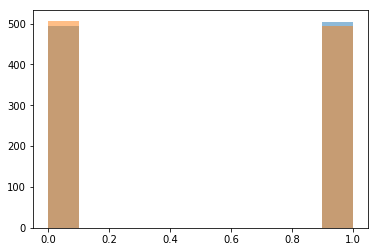

[[0 0 0 0 0 0 1 1 0 0]
 [1 0 1 0 1 1 1 1 0 1]
 [1 0 0 0 0 0 1 1 1 1]
 [0 0 0 1 1 1 1 0 0 0]
 [1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 1 1 0 1 1 1]
 [0 1 1 1 0 0 0 1 1 1]
 [1 0 0 0 0 1 0 0 1 0]
 [0 1 1 1 1 1 1 0 1 1]
 [1 1 1 1 1 1 1 0 0 1]
 [1 0 0 1 1 1 1 0 0 1]
 [0 1 0 0 0 0 1 1 1 1]
 [0 1 1 1 1 0 1 0 0 1]
 [0 0 0 1 1 1 0 1 0 1]
 [0 0 0 0 0 0 1 1 1 0]
 [0 0 0 1 1 0 1 1 0 0]
 [1 0 0 1 1 1 0 0 1 1]
 [1 1 0 1 1 0 0 1 1 1]
 [1 1 0 0 1 1 0 1 1 1]
 [1 0 1 1 0 1 1 0 1 1]
 [0 1 0 1 0 1 0 1 0 0]
 [1 0 0 1 0 1 0 0 0 0]
 [0 0 1 1 1 0 1 1 0 1]
 [1 1 0 1 1 0 0 1 1 1]
 [0 0 0 0 0 0 0 1 1 1]
 [1 1 0 0 1 0 1 1 1 1]
 [1 1 1 0 0 1 1 1 0 0]
 [0 0 1 0 1 0 0 1 1 1]
 [0 1 0 1 1 1 1 0 0 1]
 [1 1 0 0 1 1 1 0 1 0]
 [0 1 1 1 1 0 1 1 1 1]
 [0 0 1 1 0 0 1 0 1 0]
 [1 1 0 0 1 1 0 1 0 0]
 [0 0 1 1 1 1 0 0 1 1]
 [1 0 0 1 0 0 0 0 1 0]
 [1 0 0 1 1 0 0 0 0 1]
 [0 0 0 1 0 1 0 1 0 0]
 [1 0 1 1 0 1 0 1 0 1]
 [0 0 1 0 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0 0 1 1]
 [1 1 1 0 1 1 1 1 1 0]
 [0 1 1 0 1 0 0 1 0 0]
 [0 1 1 1 1

[0 0 0 0 1 1 0 1 1 1] [1 0 1 0 1 1 1 1 0 1] = 4.0
[0 0 0 0 1 1 0 1 1 1] [1 0 0 0 0 0 1 1 1 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [0 0 0 1 1 1 1 0 0 0] = 2.0
[0 0 0 0 1 1 0 1 1 1] [1 0 0 1 0 0 0 0 1 0] = 1.0
[0 0 0 0 1 1 0 1 1 1] [0 1 0 1 1 1 0 1 1 1] = 5.0
[0 0 0 0 1 1 0 1 1 1] [0 1 1 1 0 0 0 1 1 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [1 0 0 0 0 1 0 0 1 0] = 2.0
[0 0 0 0 1 1 0 1 1 1] [0 1 1 1 1 1 1 0 1 1] = 4.0
[0 0 0 0 1 1 0 1 1 1] [1 1 1 1 1 1 1 0 0 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [1 0 0 1 1 1 1 0 0 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [0 1 0 0 0 0 1 1 1 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [0 1 1 1 1 0 1 0 0 1] = 2.0
[0 0 0 0 1 1 0 1 1 1] [0 0 0 1 1 1 0 1 0 1] = 4.0
[0 0 0 0 1 1 0 1 1 1] [0 0 0 0 0 0 1 1 1 0] = 2.0
[0 0 0 0 1 1 0 1 1 1] [0 0 0 1 1 0 1 1 0 0] = 2.0
[0 0 0 0 1 1 0 1 1 1] [1 0 0 1 1 1 0 0 1 1] = 4.0
[0 0 0 0 1 1 0 1 1 1] [1 1 0 1 1 0 0 1 1 1] = 4.0
[0 0 0 0 1 1 0 1 1 1] [1 1 0 0 1 1 0 1 1 1] = 5.0
[0 0 0 0 1 1 0 1 1 1] [1 0 1 1 0 1 1 0 1 1] = 3.0
[0 0 0 0 1 1 0 1 1 1] [0 1 0 1 0 1 0 1 0 0] = 2.0


[0 1 0 0 0 1 1 0 0 0] [1 1 0 1 1 0 0 1 1 1] = 1.0
[0 1 0 0 0 1 1 0 0 0] [0 0 0 0 0 0 0 1 1 1] = 0.0
[0 1 0 0 0 1 1 0 0 0] [1 1 0 0 1 0 1 1 1 1] = 2.0
[0 1 0 0 0 1 1 0 0 0] [1 1 1 0 0 1 1 1 0 0] = 3.0
[0 1 0 0 0 1 1 0 0 0] [0 0 1 0 1 0 0 1 1 1] = 0.0
[0 1 0 0 0 1 1 0 0 0] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 1 0 0 0 1 1 0 0 0] [1 1 0 0 1 1 1 0 1 0] = 3.0
[0 1 0 0 0 1 1 0 0 0] [0 1 1 1 1 0 1 1 1 1] = 2.0
[0 1 0 0 0 1 1 0 0 0] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 1 0 0 0 1 1 0 0 0] [1 1 0 0 1 1 0 1 0 0] = 2.0
[0 1 0 0 0 1 1 0 0 0] [0 0 1 1 1 1 0 0 1 1] = 1.0
[0 1 0 0 0 1 1 0 0 0] [1 0 0 1 0 0 0 0 1 0] = 0.0
[0 1 0 0 0 1 1 0 0 0] [1 0 0 1 1 0 0 0 0 1] = 0.0
[0 1 0 0 0 1 1 0 0 0] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 1 0 0 0 1 1 0 0 0] [1 0 1 1 0 1 0 1 0 1] = 1.0
[0 1 0 0 0 1 1 0 0 0] [0 0 1 0 1 1 0 1 1 0] = 1.0
[0 1 0 0 0 1 1 0 0 0] [0 0 0 0 1 0 0 0 0 0] = 0.0
[0 1 0 0 0 1 1 0 0 0] [1 0 1 0 1 1 0 0 1 1] = 1.0
[0 1 0 0 0 1 1 0 0 0] [1 1 1 0 1 1 1 1 1 0] = 3.0
[0 1 0 0 0 1 1 0 0 0] [0 1 1 0 1 0 0 1 0 0] = 1.0


[0 1 1 0 0 1 0 0 0 1] [1 1 0 1 1 0 0 1 1 1] = 2.0
[0 1 1 0 0 1 0 0 0 1] [0 0 0 0 0 0 0 1 1 1] = 1.0
[0 1 1 0 0 1 0 0 0 1] [1 1 0 0 1 0 1 1 1 1] = 2.0
[0 1 1 0 0 1 0 0 0 1] [1 1 1 0 0 1 1 1 0 0] = 3.0
[0 1 1 0 0 1 0 0 0 1] [0 0 1 0 1 0 0 1 1 1] = 2.0
[0 1 1 0 0 1 0 0 0 1] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 1 1 0 0 1 0 0 0 1] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 1 1 0 0 1 0 0 0 1] [0 1 1 1 1 0 1 1 1 1] = 3.0
[0 1 1 0 0 1 0 0 0 1] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 1 1 0 0 1 0 0 0 1] [1 1 0 0 1 1 0 1 0 0] = 2.0
[0 1 1 0 0 1 0 0 0 1] [0 0 1 1 1 1 0 0 1 1] = 3.0
[0 1 1 0 0 1 0 0 0 1] [1 0 0 1 0 0 0 0 1 0] = 0.0
[0 1 1 0 0 1 0 0 0 1] [1 0 0 1 1 0 0 0 0 1] = 1.0
[0 1 1 0 0 1 0 0 0 1] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 1 1 0 0 1 0 0 0 1] [1 0 1 1 0 1 0 1 0 1] = 3.0
[0 1 1 0 0 1 0 0 0 1] [0 0 1 0 1 1 0 1 1 0] = 2.0
[0 1 1 0 0 1 0 0 0 1] [0 0 0 0 1 0 0 0 0 0] = 0.0
[0 1 1 0 0 1 0 0 0 1] [1 0 1 0 1 1 0 0 1 1] = 3.0
[0 1 1 0 0 1 0 0 0 1] [1 1 1 0 1 1 1 1 1 0] = 3.0
[0 1 1 0 0 1 0 0 0 1] [0 1 1 0 1 0 0 1 0 0] = 2.0


[1 0 0 0 1 1 1 0 1 0] [1 1 1 0 1 1 1 0 1 0] = 5.0
[1 0 0 0 1 1 1 0 1 0] [1 1 1 1 1 0 1 1 1 0] = 4.0
[1 0 0 0 1 1 1 0 1 0] [1 1 0 1 0 0 1 1 1 1] = 3.0
[1 0 0 0 1 1 1 0 1 0] [1 1 0 0 0 0 0 1 1 0] = 2.0
[0 1 0 1 0 1 1 1 1 1] [0 0 0 0 0 0 1 1 0 0] = 2.0
[0 1 0 1 0 1 1 1 1 1] [1 0 1 0 1 1 1 1 0 1] = 4.0
[0 1 0 1 0 1 1 1 1 1] [1 0 0 0 0 0 1 1 1 1] = 4.0
[0 1 0 1 0 1 1 1 1 1] [0 0 0 1 1 1 1 0 0 0] = 3.0
[0 1 0 1 0 1 1 1 1 1] [1 0 0 1 0 0 0 0 1 0] = 2.0
[0 1 0 1 0 1 1 1 1 1] [0 1 0 1 1 1 0 1 1 1] = 6.0
[0 1 0 1 0 1 1 1 1 1] [0 1 1 1 0 0 0 1 1 1] = 5.0
[0 1 0 1 0 1 1 1 1 1] [1 0 0 0 0 1 0 0 1 0] = 2.0
[0 1 0 1 0 1 1 1 1 1] [0 1 1 1 1 1 1 0 1 1] = 6.0
[0 1 0 1 0 1 1 1 1 1] [1 1 1 1 1 1 1 0 0 1] = 5.0
[0 1 0 1 0 1 1 1 1 1] [1 0 0 1 1 1 1 0 0 1] = 4.0
[0 1 0 1 0 1 1 1 1 1] [0 1 0 0 0 0 1 1 1 1] = 5.0
[0 1 0 1 0 1 1 1 1 1] [0 1 1 1 1 0 1 0 0 1] = 4.0
[0 1 0 1 0 1 1 1 1 1] [0 0 0 1 1 1 0 1 0 1] = 4.0
[0 1 0 1 0 1 1 1 1 1] [0 0 0 0 0 0 1 1 1 0] = 3.0
[0 1 0 1 0 1 1 1 1 1] [0 0 0 1 1 0 1 1 0 0] = 3.0


[1 0 0 0 0 1 1 0 0 1] [0 0 1 1 1 1 0 0 1 1] = 2.0
[1 0 0 0 0 1 1 0 0 1] [1 0 0 1 0 0 0 0 1 0] = 1.0
[1 0 0 0 0 1 1 0 0 1] [1 0 0 1 1 0 0 0 0 1] = 2.0
[1 0 0 0 0 1 1 0 0 1] [0 0 0 1 0 1 0 1 0 0] = 1.0
[1 0 0 0 0 1 1 0 0 1] [1 0 1 1 0 1 0 1 0 1] = 3.0
[1 0 0 0 0 1 1 0 0 1] [0 0 1 0 1 1 0 1 1 0] = 1.0
[1 0 0 0 0 1 1 0 0 1] [0 0 0 0 1 0 0 0 0 0] = 0.0
[1 0 0 0 0 1 1 0 0 1] [1 0 1 0 1 1 0 0 1 1] = 3.0
[1 0 0 0 0 1 1 0 0 1] [1 1 1 0 1 1 1 1 1 0] = 3.0
[1 0 0 0 0 1 1 0 0 1] [0 1 1 0 1 0 0 1 0 0] = 0.0
[1 0 0 0 0 1 1 0 0 1] [0 1 1 1 1 0 0 1 0 1] = 1.0
[1 0 0 0 0 1 1 0 0 1] [0 0 1 1 0 1 1 1 1 1] = 3.0
[1 0 0 0 0 1 1 0 0 1] [0 0 0 1 0 0 0 0 1 0] = 0.0
[1 0 0 0 0 1 1 0 0 1] [1 0 1 1 0 0 0 1 0 1] = 2.0
[1 0 0 0 0 1 1 0 0 1] [1 0 1 0 0 0 1 0 1 0] = 2.0
[1 0 0 0 0 1 1 0 0 1] [0 0 0 1 0 0 0 1 0 0] = 0.0
[1 0 0 0 0 1 1 0 0 1] [0 1 1 0 0 0 1 0 0 0] = 1.0
[1 0 0 0 0 1 1 0 0 1] [0 1 1 0 1 1 1 0 1 1] = 3.0
[1 0 0 0 0 1 1 0 0 1] [0 1 0 1 1 0 0 0 1 1] = 1.0
[1 0 0 0 0 1 1 0 0 1] [0 1 1 0 1 0 0 0 0 1] = 1.0


[0 1 1 1 1 1 0 0 0 0] [0 1 1 1 0 0 1 1 0 0] = 3.0
[0 1 1 1 1 1 0 0 0 0] [0 1 1 1 1 1 1 1 0 0] = 5.0
[0 1 1 1 1 1 0 0 0 0] [1 0 1 0 1 0 0 0 1 0] = 2.0
[0 1 1 1 1 1 0 0 0 0] [1 0 1 1 0 1 0 1 1 0] = 3.0
[0 1 1 1 1 1 0 0 0 0] [1 1 0 0 1 0 1 1 0 1] = 2.0
[0 1 1 1 1 1 0 0 0 0] [0 1 0 0 1 1 0 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [1 1 1 0 0 0 0 1 0 0] = 2.0
[0 1 1 1 1 1 0 0 0 0] [0 1 0 1 0 1 0 1 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [0 0 1 0 1 1 0 0 1 0] = 3.0
[0 1 1 1 1 1 0 0 0 0] [0 0 0 0 0 0 1 0 0 1] = 0.0
[0 1 1 1 1 1 0 0 0 0] [0 1 0 0 1 1 1 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [1 0 0 0 0 0 0 1 1 0] = 0.0
[0 1 1 1 1 1 0 0 0 0] [1 0 0 0 1 1 1 0 0 1] = 2.0
[0 1 1 1 1 1 0 0 0 0] [0 0 0 0 1 1 1 0 1 1] = 2.0
[0 1 1 1 1 1 0 0 0 0] [0 1 1 1 0 0 1 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [1 0 1 1 1 0 1 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [0 0 0 1 1 0 0 1 0 0] = 2.0
[0 1 1 1 1 1 0 0 0 0] [1 0 0 1 1 1 0 0 1 1] = 3.0
[0 1 1 1 1 1 0 0 0 0] [0 1 0 1 1 0 1 1 1 0] = 3.0
[0 1 1 1 1 1 0 0 0 0] [1 1 0 1 1 1 0 1 1 0] = 4.0


[0 1 1 0 0 1 1 0 0 1] [0 0 1 1 1 0 1 1 0 1] = 3.0
[0 1 1 0 0 1 1 0 0 1] [1 1 0 1 1 0 0 1 1 1] = 2.0
[0 1 1 0 0 1 1 0 0 1] [0 0 0 0 0 0 0 1 1 1] = 1.0
[0 1 1 0 0 1 1 0 0 1] [1 1 0 0 1 0 1 1 1 1] = 3.0
[0 1 1 0 0 1 1 0 0 1] [1 1 1 0 0 1 1 1 0 0] = 4.0
[0 1 1 0 0 1 1 0 0 1] [0 0 1 0 1 0 0 1 1 1] = 2.0
[0 1 1 0 0 1 1 0 0 1] [0 1 0 1 1 1 1 0 0 1] = 4.0
[0 1 1 0 0 1 1 0 0 1] [1 1 0 0 1 1 1 0 1 0] = 3.0
[0 1 1 0 0 1 1 0 0 1] [0 1 1 1 1 0 1 1 1 1] = 4.0
[0 1 1 0 0 1 1 0 0 1] [0 0 1 1 0 0 1 0 1 0] = 2.0
[0 1 1 0 0 1 1 0 0 1] [1 1 0 0 1 1 0 1 0 0] = 2.0
[0 1 1 0 0 1 1 0 0 1] [0 0 1 1 1 1 0 0 1 1] = 3.0
[0 1 1 0 0 1 1 0 0 1] [1 0 0 1 0 0 0 0 1 0] = 0.0
[0 1 1 0 0 1 1 0 0 1] [1 0 0 1 1 0 0 0 0 1] = 1.0
[0 1 1 0 0 1 1 0 0 1] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 1 1 0 0 1 1 0 0 1] [1 0 1 1 0 1 0 1 0 1] = 3.0
[0 1 1 0 0 1 1 0 0 1] [0 0 1 0 1 1 0 1 1 0] = 2.0
[0 1 1 0 0 1 1 0 0 1] [0 0 0 0 1 0 0 0 0 0] = 0.0
[0 1 1 0 0 1 1 0 0 1] [1 0 1 0 1 1 0 0 1 1] = 3.0
[0 1 1 0 0 1 1 0 0 1] [1 1 1 0 1 1 1 1 1 0] = 4.0


[0 0 0 1 0 1 1 0 0 1] [1 1 0 0 1 1 0 1 1 1] = 2.0
[0 0 0 1 0 1 1 0 0 1] [1 0 1 1 0 1 1 0 1 1] = 4.0
[0 0 0 1 0 1 1 0 0 1] [0 1 0 1 0 1 0 1 0 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [1 0 0 1 0 1 0 0 0 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [0 0 1 1 1 0 1 1 0 1] = 3.0
[0 0 0 1 0 1 1 0 0 1] [1 1 0 1 1 0 0 1 1 1] = 2.0
[0 0 0 1 0 1 1 0 0 1] [0 0 0 0 0 0 0 1 1 1] = 1.0
[0 0 0 1 0 1 1 0 0 1] [1 1 0 0 1 0 1 1 1 1] = 2.0
[0 0 0 1 0 1 1 0 0 1] [1 1 1 0 0 1 1 1 0 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [0 0 1 0 1 0 0 1 1 1] = 1.0
[0 0 0 1 0 1 1 0 0 1] [0 1 0 1 1 1 1 0 0 1] = 4.0
[0 0 0 1 0 1 1 0 0 1] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [0 1 1 1 1 0 1 1 1 1] = 3.0
[0 0 0 1 0 1 1 0 0 1] [0 0 1 1 0 0 1 0 1 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [1 1 0 0 1 1 0 1 0 0] = 1.0
[0 0 0 1 0 1 1 0 0 1] [0 0 1 1 1 1 0 0 1 1] = 3.0
[0 0 0 1 0 1 1 0 0 1] [1 0 0 1 0 0 0 0 1 0] = 1.0
[0 0 0 1 0 1 1 0 0 1] [1 0 0 1 1 0 0 0 0 1] = 2.0
[0 0 0 1 0 1 1 0 0 1] [0 0 0 1 0 1 0 1 0 0] = 2.0
[0 0 0 1 0 1 1 0 0 1] [1 0 1 1 0 1 0 1 0 1] = 3.0


[0 0 0 1 1 0 1 1 1 0] [0 0 1 1 1 0 1 1 0 1] = 4.0
[0 0 0 1 1 0 1 1 1 0] [1 1 0 1 1 0 0 1 1 1] = 4.0
[0 0 0 1 1 0 1 1 1 0] [0 0 0 0 0 0 0 1 1 1] = 2.0
[0 0 0 1 1 0 1 1 1 0] [1 1 0 0 1 0 1 1 1 1] = 4.0
[0 0 0 1 1 0 1 1 1 0] [1 1 1 0 0 1 1 1 0 0] = 2.0
[0 0 0 1 1 0 1 1 1 0] [0 0 1 0 1 0 0 1 1 1] = 3.0
[0 0 0 1 1 0 1 1 1 0] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 0 0 1 1 0 1 1 1 0] [1 1 0 0 1 1 1 0 1 0] = 3.0
[0 0 0 1 1 0 1 1 1 0] [0 1 1 1 1 0 1 1 1 1] = 5.0
[0 0 0 1 1 0 1 1 1 0] [0 0 1 1 0 0 1 0 1 0] = 3.0
[0 0 0 1 1 0 1 1 1 0] [1 1 0 0 1 1 0 1 0 0] = 2.0
[0 0 0 1 1 0 1 1 1 0] [0 0 1 1 1 1 0 0 1 1] = 3.0
[0 0 0 1 1 0 1 1 1 0] [1 0 0 1 0 0 0 0 1 0] = 2.0
[0 0 0 1 1 0 1 1 1 0] [1 0 0 1 1 0 0 0 0 1] = 2.0
[0 0 0 1 1 0 1 1 1 0] [0 0 0 1 0 1 0 1 0 0] = 2.0
[0 0 0 1 1 0 1 1 1 0] [1 0 1 1 0 1 0 1 0 1] = 2.0
[0 0 0 1 1 0 1 1 1 0] [0 0 1 0 1 1 0 1 1 0] = 3.0
[0 0 0 1 1 0 1 1 1 0] [0 0 0 0 1 0 0 0 0 0] = 1.0
[0 0 0 1 1 0 1 1 1 0] [1 0 1 0 1 1 0 0 1 1] = 2.0
[0 0 0 1 1 0 1 1 1 0] [1 1 1 0 1 1 1 1 1 0] = 4.0


[0 0 1 1 0 0 1 0 1 1] [0 0 1 1 1 0 1 1 0 1] = 4.0
[0 0 1 1 0 0 1 0 1 1] [1 1 0 1 1 0 0 1 1 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [0 0 0 0 0 0 0 1 1 1] = 2.0
[0 0 1 1 0 0 1 0 1 1] [1 1 0 0 1 0 1 1 1 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [1 1 1 0 0 1 1 1 0 0] = 2.0
[0 0 1 1 0 0 1 0 1 1] [0 0 1 0 1 0 0 1 1 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 0 1 1 0 0 1 0 1 1] [0 1 1 1 1 0 1 1 1 1] = 5.0
[0 0 1 1 0 0 1 0 1 1] [0 0 1 1 0 0 1 0 1 0] = 4.0
[0 0 1 1 0 0 1 0 1 1] [1 1 0 0 1 1 0 1 0 0] = 0.0
[0 0 1 1 0 0 1 0 1 1] [0 0 1 1 1 1 0 0 1 1] = 4.0
[0 0 1 1 0 0 1 0 1 1] [1 0 0 1 0 0 0 0 1 0] = 2.0
[0 0 1 1 0 0 1 0 1 1] [1 0 0 1 1 0 0 0 0 1] = 2.0
[0 0 1 1 0 0 1 0 1 1] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 0 1 1 0 0 1 0 1 1] [1 0 1 1 0 1 0 1 0 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [0 0 1 0 1 1 0 1 1 0] = 2.0
[0 0 1 1 0 0 1 0 1 1] [0 0 0 0 1 0 0 0 0 0] = 0.0
[0 0 1 1 0 0 1 0 1 1] [1 0 1 0 1 1 0 0 1 1] = 3.0
[0 0 1 1 0 0 1 0 1 1] [1 1 1 0 1 1 1 1 1 0] = 3.0


[0 1 0 0 0 0 1 0 0 1] [0 0 0 1 1 0 1 1 0 0] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 0 0 1 1 1 0 0 1 1] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 1 1 0 0 1 1 1] = 2.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 0 1 1 0 1 1 1] = 2.0
[0 1 0 0 0 0 1 0 0 1] [1 0 1 1 0 1 1 0 1 1] = 2.0
[0 1 0 0 0 0 1 0 0 1] [0 1 0 1 0 1 0 1 0 0] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 0 0 1 0 1 0 0 0 0] = 0.0
[0 1 0 0 0 0 1 0 0 1] [0 0 1 1 1 0 1 1 0 1] = 2.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 1 1 0 0 1 1 1] = 2.0
[0 1 0 0 0 0 1 0 0 1] [0 0 0 0 0 0 0 1 1 1] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 0 1 0 1 1 1 1] = 3.0
[0 1 0 0 0 0 1 0 0 1] [1 1 1 0 0 1 1 1 0 0] = 2.0
[0 1 0 0 0 0 1 0 0 1] [0 0 1 0 1 0 0 1 1 1] = 1.0
[0 1 0 0 0 0 1 0 0 1] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 1 0 0 0 0 1 0 0 1] [0 1 1 1 1 0 1 1 1 1] = 3.0
[0 1 0 0 0 0 1 0 0 1] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 1 0 0 1 1 0 1 0 0] = 1.0
[0 1 0 0 0 0 1 0 0 1] [0 0 1 1 1 1 0 0 1 1] = 1.0
[0 1 0 0 0 0 1 0 0 1] [1 0 0 1 0 0 0 0 1 0] = 0.0


[0 0 1 1 1 0 0 0 1 1] [0 1 0 1 0 1 0 1 0 0] = 1.0
[0 0 1 1 1 0 0 0 1 1] [1 0 0 1 0 1 0 0 0 0] = 1.0
[0 0 1 1 1 0 0 0 1 1] [0 0 1 1 1 0 1 1 0 1] = 4.0
[0 0 1 1 1 0 0 0 1 1] [1 1 0 1 1 0 0 1 1 1] = 4.0
[0 0 1 1 1 0 0 0 1 1] [0 0 0 0 0 0 0 1 1 1] = 2.0
[0 0 1 1 1 0 0 0 1 1] [1 1 0 0 1 0 1 1 1 1] = 3.0
[0 0 1 1 1 0 0 0 1 1] [1 1 1 0 0 1 1 1 0 0] = 1.0
[0 0 1 1 1 0 0 0 1 1] [0 0 1 0 1 0 0 1 1 1] = 4.0
[0 0 1 1 1 0 0 0 1 1] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 0 1 1 1 0 0 0 1 1] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 0 1 1 1 0 0 0 1 1] [0 1 1 1 1 0 1 1 1 1] = 5.0
[0 0 1 1 1 0 0 0 1 1] [0 0 1 1 0 0 1 0 1 0] = 3.0
[0 0 1 1 1 0 0 0 1 1] [1 1 0 0 1 1 0 1 0 0] = 1.0
[0 0 1 1 1 0 0 0 1 1] [0 0 1 1 1 1 0 0 1 1] = 5.0
[0 0 1 1 1 0 0 0 1 1] [1 0 0 1 0 0 0 0 1 0] = 2.0
[0 0 1 1 1 0 0 0 1 1] [1 0 0 1 1 0 0 0 0 1] = 3.0
[0 0 1 1 1 0 0 0 1 1] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 0 1 1 1 0 0 0 1 1] [1 0 1 1 0 1 0 1 0 1] = 3.0
[0 0 1 1 1 0 0 0 1 1] [0 0 1 0 1 1 0 1 1 0] = 3.0
[0 0 1 1 1 0 0 0 1 1] [0 0 0 0 1 0 0 0 0 0] = 1.0


[0 1 0 1 1 0 0 0 0 0] [1 1 0 1 1 0 0 1 1 1] = 3.0
[0 1 0 1 1 0 0 0 0 0] [0 0 0 0 0 0 0 1 1 1] = 0.0
[0 1 0 1 1 0 0 0 0 0] [1 1 0 0 1 0 1 1 1 1] = 2.0
[0 1 0 1 1 0 0 0 0 0] [1 1 1 0 0 1 1 1 0 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [0 0 1 0 1 0 0 1 1 1] = 1.0
[0 1 0 1 1 0 0 0 0 0] [0 1 0 1 1 1 1 0 0 1] = 3.0
[0 1 0 1 1 0 0 0 0 0] [1 1 0 0 1 1 1 0 1 0] = 2.0
[0 1 0 1 1 0 0 0 0 0] [0 1 1 1 1 0 1 1 1 1] = 3.0
[0 1 0 1 1 0 0 0 0 0] [0 0 1 1 0 0 1 0 1 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [1 1 0 0 1 1 0 1 0 0] = 2.0
[0 1 0 1 1 0 0 0 0 0] [0 0 1 1 1 1 0 0 1 1] = 2.0
[0 1 0 1 1 0 0 0 0 0] [1 0 0 1 0 0 0 0 1 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [1 0 0 1 1 0 0 0 0 1] = 2.0
[0 1 0 1 1 0 0 0 0 0] [0 0 0 1 0 1 0 1 0 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [1 0 1 1 0 1 0 1 0 1] = 1.0
[0 1 0 1 1 0 0 0 0 0] [0 0 1 0 1 1 0 1 1 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [0 0 0 0 1 0 0 0 0 0] = 1.0
[0 1 0 1 1 0 0 0 0 0] [1 0 1 0 1 1 0 0 1 1] = 1.0
[0 1 0 1 1 0 0 0 0 0] [1 1 1 0 1 1 1 1 1 0] = 2.0
[0 1 0 1 1 0 0 0 0 0] [0 1 1 0 1 0 0 1 0 0] = 2.0


[1 1 0 0 1 1 1 0 0 1] [1 0 1 1 0 0 0 1 0 1] = 2.0
[1 1 0 0 1 1 1 0 0 1] [1 0 1 0 0 0 1 0 1 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 0 0 1 0 0 0 1 0 0] = 0.0
[1 1 0 0 1 1 1 0 0 1] [0 1 1 0 0 0 1 0 0 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 1 1 0 1 1 1 0 1 1] = 5.0
[1 1 0 0 1 1 1 0 0 1] [0 1 0 1 1 0 0 0 1 1] = 3.0
[1 1 0 0 1 1 1 0 0 1] [0 1 1 0 1 0 0 0 0 1] = 3.0
[1 1 0 0 1 1 1 0 0 1] [0 1 0 1 0 1 0 0 1 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 1 1 1 0 0 1 1 0 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 1 1 1 1 1 1 1 0 0] = 4.0
[1 1 0 0 1 1 1 0 0 1] [1 0 1 0 1 0 0 0 1 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [1 0 1 1 0 1 0 1 1 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [1 1 0 0 1 0 1 1 0 1] = 5.0
[1 1 0 0 1 1 1 0 0 1] [0 1 0 0 1 1 0 0 1 1] = 4.0
[1 1 0 0 1 1 1 0 0 1] [1 1 1 0 0 0 0 1 0 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 1 0 1 0 1 0 1 1 1] = 3.0
[1 1 0 0 1 1 1 0 0 1] [0 0 1 0 1 1 0 0 1 0] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 0 0 0 0 0 1 0 0 1] = 2.0
[1 1 0 0 1 1 1 0 0 1] [0 1 0 0 1 1 1 0 1 1] = 5.0
[1 1 0 0 1 1 1 0 0 1] [1 0 0 0 0 0 0 1 1 0] = 1.0


[1 1 1 1 1 1 0 0 1 1] [0 1 1 1 0 0 1 1 0 0] = 3.0
[1 1 1 1 1 1 0 0 1 1] [0 1 1 1 1 1 1 1 0 0] = 5.0
[1 1 1 1 1 1 0 0 1 1] [1 0 1 0 1 0 0 0 1 0] = 4.0
[1 1 1 1 1 1 0 0 1 1] [1 0 1 1 0 1 0 1 1 0] = 5.0
[1 1 1 1 1 1 0 0 1 1] [1 1 0 0 1 0 1 1 0 1] = 4.0
[1 1 1 1 1 1 0 0 1 1] [0 1 0 0 1 1 0 0 1 1] = 5.0
[1 1 1 1 1 1 0 0 1 1] [1 1 1 0 0 0 0 1 0 0] = 3.0
[1 1 1 1 1 1 0 0 1 1] [0 1 0 1 0 1 0 1 1 1] = 5.0
[1 1 1 1 1 1 0 0 1 1] [0 0 1 0 1 1 0 0 1 0] = 4.0
[1 1 1 1 1 1 0 0 1 1] [0 0 0 0 0 0 1 0 0 1] = 1.0
[1 1 1 1 1 1 0 0 1 1] [0 1 0 0 1 1 1 0 1 1] = 5.0
[1 1 1 1 1 1 0 0 1 1] [1 0 0 0 0 0 0 1 1 0] = 2.0
[1 1 1 1 1 1 0 0 1 1] [1 0 0 0 1 1 1 0 0 1] = 4.0
[1 1 1 1 1 1 0 0 1 1] [0 0 0 0 1 1 1 0 1 1] = 4.0
[1 1 1 1 1 1 0 0 1 1] [0 1 1 1 0 0 1 0 1 1] = 5.0
[1 1 1 1 1 1 0 0 1 1] [1 0 1 1 1 0 1 0 1 1] = 6.0
[1 1 1 1 1 1 0 0 1 1] [0 0 0 1 1 0 0 1 0 0] = 2.0
[1 1 1 1 1 1 0 0 1 1] [1 0 0 1 1 1 0 0 1 1] = 6.0
[1 1 1 1 1 1 0 0 1 1] [0 1 0 1 1 0 1 1 1 0] = 4.0
[1 1 1 1 1 1 0 0 1 1] [1 1 0 1 1 1 0 1 1 0] = 6.0


[1 1 1 0 0 0 1 0 1 1] [1 0 0 1 1 1 0 0 1 1] = 3.0
[1 1 1 0 0 0 1 0 1 1] [0 1 0 1 1 0 1 1 1 0] = 3.0
[1 1 1 0 0 0 1 0 1 1] [1 1 0 1 1 1 0 1 1 0] = 3.0
[1 1 1 0 0 0 1 0 1 1] [0 0 0 1 0 0 1 0 0 0] = 1.0
[1 1 1 0 0 0 1 0 1 1] [0 0 0 1 1 0 0 0 0 0] = 0.0
[1 1 1 0 0 0 1 0 1 1] [1 1 1 0 0 1 1 0 1 0] = 5.0
[1 1 1 0 0 0 1 0 1 1] [0 1 0 0 1 1 1 1 1 1] = 4.0
[1 1 1 0 0 0 1 0 1 1] [0 1 1 1 1 1 1 0 1 0] = 4.0
[1 1 1 0 0 0 1 0 1 1] [0 0 0 1 0 0 1 0 1 0] = 2.0
[1 1 1 0 0 0 1 0 1 1] [0 0 0 0 1 1 0 0 1 1] = 2.0
[1 1 1 0 0 0 1 0 1 1] [0 1 1 0 1 0 1 0 0 1] = 4.0
[1 1 1 0 0 0 1 0 1 1] [0 0 1 0 1 1 1 1 1 0] = 3.0
[1 1 1 0 0 0 1 0 1 1] [0 0 1 1 0 1 0 1 1 0] = 2.0
[1 1 1 0 0 0 1 0 1 1] [1 0 0 1 0 1 1 1 0 1] = 3.0
[1 1 1 0 0 0 1 0 1 1] [0 1 1 0 1 1 0 0 0 0] = 2.0
[1 1 1 0 0 0 1 0 1 1] [0 0 0 1 1 1 1 0 0 0] = 1.0
[1 1 1 0 0 0 1 0 1 1] [0 1 1 0 0 1 0 1 0 0] = 2.0
[1 1 1 0 0 0 1 0 1 1] [1 0 0 0 1 0 1 1 1 0] = 3.0
[1 1 1 0 0 0 1 0 1 1] [1 1 0 1 1 0 0 1 0 0] = 2.0
[1 1 1 0 0 0 1 0 1 1] [0 1 0 0 0 1 0 1 1 0] = 2.0


[0 1 0 1 0 0 1 0 0 0] [1 0 0 1 1 1 0 0 1 1] = 1.0
[0 1 0 1 0 0 1 0 0 0] [0 1 0 1 1 0 1 1 1 0] = 3.0
[0 1 0 1 0 0 1 0 0 0] [1 1 0 1 1 1 0 1 1 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 0 0 1 0 0 1 0 0 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 0 0 1 1 0 0 0 0 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [1 1 1 0 0 1 1 0 1 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 1 0 0 1 1 1 1 1 1] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 1 1 1 1 1 1 0 1 0] = 3.0
[0 1 0 1 0 0 1 0 0 0] [0 0 0 1 0 0 1 0 1 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 0 0 0 1 1 0 0 1 1] = 0.0
[0 1 0 1 0 0 1 0 0 0] [0 1 1 0 1 0 1 0 0 1] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 0 1 0 1 1 1 1 1 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [0 0 1 1 0 1 0 1 1 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [1 0 0 1 0 1 1 1 0 1] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 1 1 0 1 1 0 0 0 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [0 0 0 1 1 1 1 0 0 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 1 1 0 0 1 0 1 0 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [1 0 0 0 1 0 1 1 1 0] = 1.0
[0 1 0 1 0 0 1 0 0 0] [1 1 0 1 1 0 0 1 0 0] = 2.0
[0 1 0 1 0 0 1 0 0 0] [0 1 0 0 0 1 0 1 1 0] = 1.0


[0 0 0 1 1 1 1 1 0 0] [1 0 0 1 0 1 0 0 0 0] = 2.0
[0 0 0 1 1 1 1 1 0 0] [0 0 1 1 1 0 1 1 0 1] = 4.0
[0 0 0 1 1 1 1 1 0 0] [1 1 0 1 1 0 0 1 1 1] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 0 0 0 0 0 0 1 1 1] = 1.0
[0 0 0 1 1 1 1 1 0 0] [1 1 0 0 1 0 1 1 1 1] = 3.0
[0 0 0 1 1 1 1 1 0 0] [1 1 1 0 0 1 1 1 0 0] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 0 1 0 1 0 0 1 1 1] = 2.0
[0 0 0 1 1 1 1 1 0 0] [0 1 0 1 1 1 1 0 0 1] = 4.0
[0 0 0 1 1 1 1 1 0 0] [1 1 0 0 1 1 1 0 1 0] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 1 1 1 1 0 1 1 1 1] = 4.0
[0 0 0 1 1 1 1 1 0 0] [0 0 1 1 0 0 1 0 1 0] = 2.0
[0 0 0 1 1 1 1 1 0 0] [1 1 0 0 1 1 0 1 0 0] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 0 1 1 1 1 0 0 1 1] = 3.0
[0 0 0 1 1 1 1 1 0 0] [1 0 0 1 0 0 0 0 1 0] = 1.0
[0 0 0 1 1 1 1 1 0 0] [1 0 0 1 1 0 0 0 0 1] = 2.0
[0 0 0 1 1 1 1 1 0 0] [0 0 0 1 0 1 0 1 0 0] = 3.0
[0 0 0 1 1 1 1 1 0 0] [1 0 1 1 0 1 0 1 0 1] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 0 1 0 1 1 0 1 1 0] = 3.0
[0 0 0 1 1 1 1 1 0 0] [0 0 0 0 1 0 0 0 0 0] = 1.0
[0 0 0 1 1 1 1 1 0 0] [1 0 1 0 1 1 0 0 1 1] = 2.0


[1 0 0 1 0 1 0 1 1 0] [0 0 1 1 1 0 1 1 0 1] = 2.0
[1 0 0 1 0 1 0 1 1 0] [1 1 0 1 1 0 0 1 1 1] = 4.0
[1 0 0 1 0 1 0 1 1 0] [0 0 0 0 0 0 0 1 1 1] = 2.0
[1 0 0 1 0 1 0 1 1 0] [1 1 0 0 1 0 1 1 1 1] = 3.0
[1 0 0 1 0 1 0 1 1 0] [1 1 1 0 0 1 1 1 0 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [0 0 1 0 1 0 0 1 1 1] = 2.0
[1 0 0 1 0 1 0 1 1 0] [0 1 0 1 1 1 1 0 0 1] = 2.0
[1 0 0 1 0 1 0 1 1 0] [1 1 0 0 1 1 1 0 1 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [0 1 1 1 1 0 1 1 1 1] = 3.0
[1 0 0 1 0 1 0 1 1 0] [0 0 1 1 0 0 1 0 1 0] = 2.0
[1 0 0 1 0 1 0 1 1 0] [1 1 0 0 1 1 0 1 0 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [0 0 1 1 1 1 0 0 1 1] = 3.0
[1 0 0 1 0 1 0 1 1 0] [1 0 0 1 0 0 0 0 1 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [1 0 0 1 1 0 0 0 0 1] = 2.0
[1 0 0 1 0 1 0 1 1 0] [0 0 0 1 0 1 0 1 0 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [1 0 1 1 0 1 0 1 0 1] = 4.0
[1 0 0 1 0 1 0 1 1 0] [0 0 1 0 1 1 0 1 1 0] = 3.0
[1 0 0 1 0 1 0 1 1 0] [0 0 0 0 1 0 0 0 0 0] = 0.0
[1 0 0 1 0 1 0 1 1 0] [1 0 1 0 1 1 0 0 1 1] = 3.0
[1 0 0 1 0 1 0 1 1 0] [1 1 1 0 1 1 1 1 1 0] = 4.0


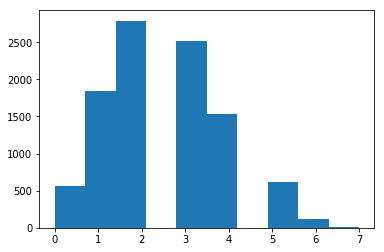

~ ~ ~ ~~ ATTEMPT 0


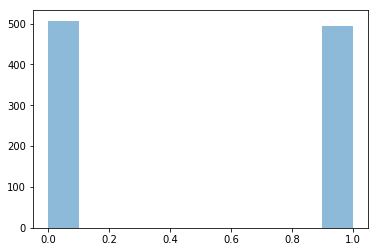

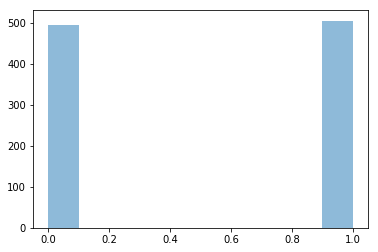

len all_pfz 0


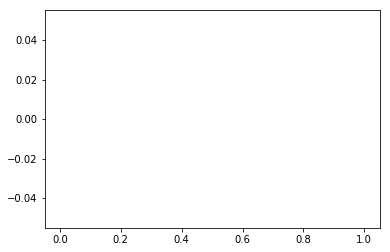

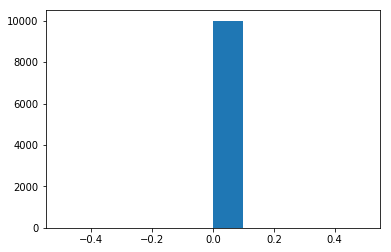

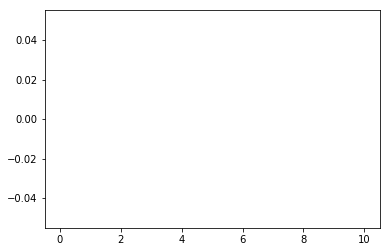

OBS SSHAPE (100, 100)
tvt: 10000 8000 1000
PFZ is
[ 2.  5.  3. ...,  2.  1.  3.]
<NN_utils.BigTable object at 0x7f5f16271b70> <NN_utils.BigTable object at 0x7f5f16271d30> Tensor("psi_select_24:0", shape=(?, 1), dtype=int32) Tensor("q_select_24:0", shape=(?, 1), dtype=int32)
psi_sel shape (?, 1)
kk (100, 10)
selector shape (?, 1)
flat selector shape (?,)
call kk (100, 10)
'rows' shape, (?, 10)
kk (100, 10)
selector shape (?, 1)
flat selector shape (?,)
call kk (100, 10)
'rows' shape, (?, 10)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
q_select (InputLayer)           (None, 1)            0                                            
__________________________________________________________________________________________________
psi_select (InputLayer)         (None, 1)            0                                            
_________

10000/10000 [==============================] - 0s 2us/step - loss: 37590.3992
Epoch 66/100000
10000/10000 [==============================] - 0s 2us/step - loss: 37313.0102
Epoch 67/100000
10000/10000 [==============================] - 0s 2us/step - loss: 37037.7641
Epoch 68/100000
10000/10000 [==============================] - 0s 3us/step - loss: 36764.8246
Epoch 69/100000
10000/10000 [==============================] - 0s 2us/step - loss: 36493.9480
Epoch 70/100000
10000/10000 [==============================] - 0s 3us/step - loss: 36225.2848
Epoch 71/100000
10000/10000 [==============================] - 0s 3us/step - loss: 35958.7543
Epoch 72/100000
10000/10000 [==============================] - 0s 3us/step - loss: 35694.2812
Epoch 73/100000
10000/10000 [==============================] - 0s 3us/step - loss: 35431.9133
Epoch 74/100000
10000/10000 [==============================] - 0s 3us/step - loss: 35171.6301
Epoch 75/100000
10000/10000 [==============================] - 0s 3us/step -

10000/10000 [==============================] - 0s 2us/step - loss: 20120.6602
Epoch 152/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19976.9830
Epoch 153/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19834.3578
Epoch 154/100000
10000/10000 [==============================] - 0s 3us/step - loss: 19692.7535
Epoch 155/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19552.2113
Epoch 156/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19412.6766
Epoch 157/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19274.1723
Epoch 158/100000
10000/10000 [==============================] - 0s 2us/step - loss: 19136.7039
Epoch 159/100000
10000/10000 [==============================] - 0s 3us/step - loss: 19000.2311
Epoch 160/100000
10000/10000 [==============================] - 0s 2us/step - loss: 18864.7299
Epoch 161/100000
10000/10000 [==============================] - 0s 

10000/10000 [==============================] - 0s 2us/step - loss: 10889.0637
Epoch 238/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10811.5632
Epoch 239/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10734.6276
Epoch 240/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10658.2113
Epoch 241/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10582.3488
Epoch 242/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10506.9961
Epoch 243/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10432.2068
Epoch 244/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10357.9138
Epoch 245/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10284.1481
Epoch 246/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10210.9029
Epoch 247/100000
10000/10000 [==============================] - 0s 

10000/10000 [==============================] - 0s 2us/step - loss: 5822.0544
Epoch 325/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5779.8459
Epoch 326/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5737.9261
Epoch 327/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5696.3205
Epoch 328/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5654.9715
Epoch 329/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5613.9322
Epoch 330/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5573.1697
Epoch 331/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5532.6861
Epoch 332/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5492.4911
Epoch 333/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5452.5735
Epoch 334/100000
10000/10000 [==============================] - 0s 2us/step -

10000/10000 [==============================] - 0s 2us/step - loss: 3060.6114
Epoch 412/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3037.6644
Epoch 413/100000
10000/10000 [==============================] - 0s 3us/step - loss: 3014.8737
Epoch 414/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2992.2449
Epoch 415/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2969.7804
Epoch 416/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2947.4723
Epoch 417/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2925.3215
Epoch 418/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2903.3204
Epoch 419/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2881.4834
Epoch 420/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2859.7990
Epoch 421/100000
10000/10000 [==============================] - 0s 3us/step -

10000/10000 [==============================] - 0s 3us/step - loss: 1567.9708
Epoch 499/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1555.6872
Epoch 500/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1543.4931
Epoch 501/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1531.3851
Epoch 502/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1519.3683
Epoch 503/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1507.4372
Epoch 504/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1495.5948
Epoch 505/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1483.8396
Epoch 506/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1472.1678
Epoch 507/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1460.5832
Epoch 508/100000
10000/10000 [==============================] - 0s 2us/step -

10000/10000 [==============================] - 0s 2us/step - loss: 777.5181
Epoch 586/100000
10000/10000 [==============================] - 0s 2us/step - loss: 771.1120
Epoch 587/100000
10000/10000 [==============================] - 0s 2us/step - loss: 764.7518
Epoch 588/100000
10000/10000 [==============================] - 0s 2us/step - loss: 758.4448
Epoch 589/100000
10000/10000 [==============================] - 0s 2us/step - loss: 752.1823
Epoch 590/100000
10000/10000 [==============================] - 0s 2us/step - loss: 745.9699
Epoch 591/100000
10000/10000 [==============================] - 0s 2us/step - loss: 739.8028
Epoch 592/100000
10000/10000 [==============================] - 0s 2us/step - loss: 733.6824
Epoch 593/100000
10000/10000 [==============================] - 0s 2us/step - loss: 727.6118
Epoch 594/100000
10000/10000 [==============================] - 0s 2us/step - loss: 721.5867
Epoch 595/100000
10000/10000 [==============================] - 0s 2us/step - loss: 715

10000/10000 [==============================] - 0s 2us/step - loss: 367.8438
Epoch 674/100000
10000/10000 [==============================] - 0s 2us/step - loss: 364.6384
Epoch 675/100000
10000/10000 [==============================] - 0s 2us/step - loss: 361.4588
Epoch 676/100000
10000/10000 [==============================] - 0s 3us/step - loss: 358.3048
Epoch 677/100000
10000/10000 [==============================] - 0s 3us/step - loss: 355.1766
Epoch 678/100000
10000/10000 [==============================] - 0s 2us/step - loss: 352.0745
Epoch 679/100000
10000/10000 [==============================] - 0s 2us/step - loss: 348.9967
Epoch 680/100000
10000/10000 [==============================] - 0s 2us/step - loss: 345.9427
Epoch 681/100000
10000/10000 [==============================] - 0s 3us/step - loss: 342.9154
Epoch 682/100000
10000/10000 [==============================] - 0s 3us/step - loss: 339.9114
Epoch 683/100000
10000/10000 [==============================] - 0s 3us/step - loss: 336

10000/10000 [==============================] - 0s 2us/step - loss: 166.3938
Epoch 762/100000
10000/10000 [==============================] - 0s 3us/step - loss: 164.8536
Epoch 763/100000
10000/10000 [==============================] - 0s 2us/step - loss: 163.3274
Epoch 764/100000
10000/10000 [==============================] - 0s 3us/step - loss: 161.8132
Epoch 765/100000
10000/10000 [==============================] - 0s 2us/step - loss: 160.3134
Epoch 766/100000
10000/10000 [==============================] - 0s 3us/step - loss: 158.8265
Epoch 767/100000
10000/10000 [==============================] - 0s 2us/step - loss: 157.3506
Epoch 768/100000
10000/10000 [==============================] - 0s 3us/step - loss: 155.8888
Epoch 769/100000
10000/10000 [==============================] - 0s 2us/step - loss: 154.4394
Epoch 770/100000
10000/10000 [==============================] - 0s 3us/step - loss: 153.0017
Epoch 771/100000
10000/10000 [==============================] - 0s 2us/step - loss: 151

10000/10000 [==============================] - 0s 3us/step - loss: 71.5050
Epoch 850/100000
10000/10000 [==============================] - 0s 2us/step - loss: 70.7998
Epoch 851/100000
10000/10000 [==============================] - 0s 2us/step - loss: 70.1002
Epoch 852/100000
10000/10000 [==============================] - 0s 3us/step - loss: 69.4068
Epoch 853/100000
10000/10000 [==============================] - 0s 2us/step - loss: 68.7205
Epoch 854/100000
10000/10000 [==============================] - 0s 3us/step - loss: 68.0399
Epoch 855/100000
10000/10000 [==============================] - 0s 2us/step - loss: 67.3656
Epoch 856/100000
10000/10000 [==============================] - 0s 2us/step - loss: 66.6978
Epoch 857/100000
10000/10000 [==============================] - 0s 2us/step - loss: 66.0364
Epoch 858/100000
10000/10000 [==============================] - 0s 2us/step - loss: 65.3801
Epoch 859/100000
10000/10000 [==============================] - 0s 2us/step - loss: 64.7300
Epoch

10000/10000 [==============================] - 0s 2us/step - loss: 28.6792
Epoch 939/100000
10000/10000 [==============================] - 0s 2us/step - loss: 28.3759
Epoch 940/100000
10000/10000 [==============================] - 0s 2us/step - loss: 28.0758
Epoch 941/100000
10000/10000 [==============================] - 0s 2us/step - loss: 27.7786
Epoch 942/100000
10000/10000 [==============================] - 0s 3us/step - loss: 27.4841
Epoch 943/100000
10000/10000 [==============================] - 0s 2us/step - loss: 27.1926
Epoch 944/100000
10000/10000 [==============================] - 0s 3us/step - loss: 26.9040
Epoch 945/100000
10000/10000 [==============================] - 0s 3us/step - loss: 26.6185
Epoch 946/100000
10000/10000 [==============================] - 0s 2us/step - loss: 26.3355
Epoch 947/100000
10000/10000 [==============================] - 0s 2us/step - loss: 26.0553
Epoch 948/100000
10000/10000 [==============================] - 0s 2us/step - loss: 25.7783
Epoch

10000/10000 [==============================] - 0s 2us/step - loss: 10.9226
Epoch 1027/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.7998
Epoch 1028/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.6787
Epoch 1029/100000
10000/10000 [==============================] - 0s 3us/step - loss: 10.5586
Epoch 1030/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.4398
Epoch 1031/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.3226
Epoch 1032/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.2063
Epoch 1033/100000
10000/10000 [==============================] - 0s 2us/step - loss: 10.0915
Epoch 1034/100000
10000/10000 [==============================] - 0s 2us/step - loss: 9.9777
Epoch 1035/100000
10000/10000 [==============================] - 0s 2us/step - loss: 9.8653
Epoch 1036/100000
10000/10000 [==============================] - 0s 2us/step - loss: 9.754

10000/10000 [==============================] - 0s 2us/step - loss: 3.9541
Epoch 1116/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.9096
Epoch 1117/100000
10000/10000 [==============================] - 0s 3us/step - loss: 3.8655
Epoch 1118/100000
10000/10000 [==============================] - 0s 3us/step - loss: 3.8219
Epoch 1119/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.7788
Epoch 1120/100000
10000/10000 [==============================] - 0s 3us/step - loss: 3.7363
Epoch 1121/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.6944
Epoch 1122/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.6527
Epoch 1123/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.6118
Epoch 1124/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.5712
Epoch 1125/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.5312
Epoch 

Epoch 1204/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.5400
Epoch 1205/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.5258
Epoch 1206/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.5116
Epoch 1207/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.4977
Epoch 1208/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.4840
Epoch 1209/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.4704
Epoch 1210/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.4570
Epoch 1211/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.4439
Epoch 1212/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.4309
Epoch 1213/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.4181
Epoch 1214/100000
10000/10000 [==============================] - 0s 2us/step - l

10000/10000 [==============================] - 0s 3us/step - loss: 0.8068
Epoch 1294/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.8028
Epoch 1295/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.7988
Epoch 1296/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.7949
Epoch 1297/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.7910
Epoch 1298/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.7872
Epoch 1299/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.7835
Epoch 1300/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.7798
Epoch 1301/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.7761
Epoch 1302/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.7726
Epoch 1303/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.7691
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.6063
Epoch 1383/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.6052
Epoch 1384/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.6042
Epoch 1385/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.6031
Epoch 1386/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.6021
Epoch 1387/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.6011
Epoch 1388/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.6002
Epoch 1389/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5992
Epoch 1390/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5983
Epoch 1391/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5973
Epoch 1392/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5964
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5571
Epoch 1472/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5569
Epoch 1473/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5567
Epoch 1474/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5565
Epoch 1475/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5563
Epoch 1476/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5561
Epoch 1477/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5559
Epoch 1478/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5557
Epoch 1479/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5555
Epoch 1480/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5554
Epoch 1481/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5552
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5494
Epoch 1561/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5493
Epoch 1562/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5493
Epoch 1563/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5493
Epoch 1564/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5493
Epoch 1565/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5493
Epoch 1566/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5492
Epoch 1567/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5492
Epoch 1568/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5492
Epoch 1569/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5492
Epoch 1570/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5492
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5482
Epoch 1650/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5482
Epoch 1651/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5482
Epoch 1652/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5482
Epoch 1653/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5482
Epoch 1654/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5482
Epoch 1655/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5481
Epoch 1656/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5481
Epoch 1657/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5481
Epoch 1658/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5481
Epoch 1659/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5481
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5463
Epoch 1739/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5462
Epoch 1740/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5462
Epoch 1741/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5462
Epoch 1742/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5461
Epoch 1743/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5461
Epoch 1744/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5460
Epoch 1745/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5460
Epoch 1746/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5460
Epoch 1747/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5459
Epoch 1748/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5459
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5393
Epoch 1828/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5391
Epoch 1829/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5390
Epoch 1830/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5388
Epoch 1831/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5387
Epoch 1832/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5385
Epoch 1833/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5383
Epoch 1834/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5381
Epoch 1835/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.5379
Epoch 1836/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5378
Epoch 1837/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5376
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.5023
Epoch 1917/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5014
Epoch 1918/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.5005
Epoch 1919/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.4996
Epoch 1920/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.4986
Epoch 1921/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.4976
Epoch 1922/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.4966
Epoch 1923/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.4956
Epoch 1924/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.4946
Epoch 1925/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.4935
Epoch 1926/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.4925
Epoch 

10000/10000 [==============================] - 0s 3us/step - loss: 0.3402
Epoch 2006/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3379
Epoch 2007/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3355
Epoch 2008/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3330
Epoch 2009/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3307
Epoch 2010/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3283
Epoch 2011/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3260
Epoch 2012/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3236
Epoch 2013/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3212
Epoch 2014/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.3189
Epoch 2015/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.3166
Epoch 

10000/10000 [==============================] - 0s 4us/step - loss: 0.1791
Epoch 2095/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.1780
Epoch 2096/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1770
Epoch 2097/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1760
Epoch 2098/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.1750
Epoch 2099/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1740
Epoch 2100/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1731
Epoch 2101/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1721
Epoch 2102/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.1712
Epoch 2103/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.1703
Epoch 2104/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1694
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.1164
Epoch 2184/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1159
Epoch 2185/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1154
Epoch 2186/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1149
Epoch 2187/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1144
Epoch 2188/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1139
Epoch 2189/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1134
Epoch 2190/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1129
Epoch 2191/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1124
Epoch 2192/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1120
Epoch 2193/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.1115
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0871
Epoch 2273/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0868
Epoch 2274/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0866
Epoch 2275/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.0864
Epoch 2276/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0862
Epoch 2277/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0860
Epoch 2278/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0857
Epoch 2279/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0855
Epoch 2280/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0853
Epoch 2281/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0851
Epoch 2282/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.0849
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0713
Epoch 2362/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0711
Epoch 2363/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0710
Epoch 2364/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0709
Epoch 2365/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0708
Epoch 2366/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0707
Epoch 2367/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0706
Epoch 2368/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0705
Epoch 2369/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0703
Epoch 2370/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0702
Epoch 2371/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0701
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0631
Epoch 2451/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0631
Epoch 2452/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0630
Epoch 2453/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0629
Epoch 2454/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0628
Epoch 2455/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0627
Epoch 2456/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0627
Epoch 2457/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0626
Epoch 2458/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0625
Epoch 2459/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0624
Epoch 2460/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0623
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0556
Epoch 2540/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0556
Epoch 2541/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0555
Epoch 2542/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0554
Epoch 2543/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0553
Epoch 2544/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0552
Epoch 2545/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0551
Epoch 2546/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0550
Epoch 2547/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0549
Epoch 2548/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0549
Epoch 2549/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0548
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0478
Epoch 2629/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0478
Epoch 2630/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0477
Epoch 2631/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0476
Epoch 2632/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0475
Epoch 2633/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0474
Epoch 2634/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0473
Epoch 2635/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0473
Epoch 2636/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0472
Epoch 2637/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0471
Epoch 2638/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0470
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0413
Epoch 2718/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0413
Epoch 2719/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0412
Epoch 2720/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0412
Epoch 2721/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0411
Epoch 2722/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0410
Epoch 2723/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0410
Epoch 2724/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0409
Epoch 2725/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.0409
Epoch 2726/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.0408
Epoch 2727/100000
10000/10000 [==============================] - 0s 3us/step - loss: 0.0407
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0371
Epoch 2807/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0371
Epoch 2808/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0371
Epoch 2809/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0370
Epoch 2810/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0370
Epoch 2811/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0370
Epoch 2812/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0369
Epoch 2813/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0369
Epoch 2814/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0369
Epoch 2815/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0368
Epoch 2816/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0368
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0349
Epoch 2896/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0348
Epoch 2897/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0348
Epoch 2898/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0348
Epoch 2899/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0348
Epoch 2900/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0348
Epoch 2901/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0347
Epoch 2902/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0347
Epoch 2903/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0347
Epoch 2904/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0347
Epoch 2905/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0347
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0333
Epoch 2985/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0333
Epoch 2986/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2987/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2988/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2989/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2990/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2991/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0332
Epoch 2992/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0331
Epoch 2993/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0331
Epoch 2994/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0331
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0319
Epoch 3074/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0319
Epoch 3075/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0319
Epoch 3076/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0319
Epoch 3077/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0319
Epoch 3078/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 3079/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 3080/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 3081/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 3082/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 3083/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0318
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0307
Epoch 3163/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0307
Epoch 3164/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0307
Epoch 3165/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0307
Epoch 3166/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0307
Epoch 3167/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 3168/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 3169/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 3170/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 3171/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 3172/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0306
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0296
Epoch 3252/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0296
Epoch 3253/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0296
Epoch 3254/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0296
Epoch 3255/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3256/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3257/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3258/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3259/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3260/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 3261/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0295
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0283
Epoch 3341/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0283
Epoch 3342/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0283
Epoch 3343/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0282
Epoch 3344/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0282
Epoch 3345/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0282
Epoch 3346/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0282
Epoch 3347/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0281
Epoch 3348/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0281
Epoch 3349/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0281
Epoch 3350/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0281
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0256
Epoch 3430/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0255
Epoch 3431/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0255
Epoch 3432/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0254
Epoch 3433/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0254
Epoch 3434/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0253
Epoch 3435/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0253
Epoch 3436/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0252
Epoch 3437/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0252
Epoch 3438/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0251
Epoch 3439/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0251
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0189
Epoch 3519/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0188
Epoch 3520/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0186
Epoch 3521/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0185
Epoch 3522/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0184
Epoch 3523/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0183
Epoch 3524/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0182
Epoch 3525/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0181
Epoch 3526/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0180
Epoch 3527/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0178
Epoch 3528/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0177
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 0.0070
Epoch 3608/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0068
Epoch 3609/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0067
Epoch 3610/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0066
Epoch 3611/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0064
Epoch 3612/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0063
Epoch 3613/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0062
Epoch 3614/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0061
Epoch 3615/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0060
Epoch 3616/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0058
Epoch 3617/100000
10000/10000 [==============================] - 0s 2us/step - loss: 0.0057
Epoch 

10000/10000 [==============================] - 0s 2us/step - loss: 4.7840e-04
Epoch 3696/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.5858e-04
Epoch 3697/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.3935e-04
Epoch 3698/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.2130e-04
Epoch 3699/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.0326e-04
Epoch 3700/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.8620e-04
Epoch 3701/100000
10000/10000 [==============================] - 0s 3us/step - loss: 3.6974e-04
Epoch 3702/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.5409e-04
Epoch 3703/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.3904e-04
Epoch 3704/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.2434e-04
Epoch 3705/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 7.7049e-06
Epoch 3781/100000
10000/10000 [==============================] - 0s 2us/step - loss: 7.3055e-06
Epoch 3782/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.9164e-06
Epoch 3783/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.5527e-06
Epoch 3784/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.2056e-06
Epoch 3785/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.8682e-06
Epoch 3786/100000
10000/10000 [==============================] - 0s 3us/step - loss: 5.5688e-06
Epoch 3787/100000
10000/10000 [==============================] - 0s 3us/step - loss: 5.2686e-06
Epoch 3788/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.9805e-06
Epoch 3789/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.7154e-06
Epoch 3790/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 3us/step - loss: 3.1250e-08
Epoch 3866/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2.8806e-08
Epoch 3867/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.6642e-08
Epoch 3868/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.4575e-08
Epoch 3869/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2.2686e-08
Epoch 3870/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2.0880e-08
Epoch 3871/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.9246e-08
Epoch 3872/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.7781e-08
Epoch 3873/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.6355e-08
Epoch 3874/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.5085e-08
Epoch 3875/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 7.2757e-12
Epoch 3951/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.5258e-12
Epoch 3952/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.9120e-12
Epoch 3953/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.3367e-12
Epoch 3954/100000
10000/10000 [==============================] - 0s 3us/step - loss: 4.8704e-12
Epoch 3955/100000
10000/10000 [==============================] - 0s 3us/step - loss: 4.4283e-12
Epoch 3956/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.0450e-12
Epoch 3957/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.7137e-12
Epoch 3958/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.3964e-12
Epoch 3959/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.1171e-12
Epoch 3960/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 5.7317e-13
Epoch 4036/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.6420e-13
Epoch 4037/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.6286e-13
Epoch 4038/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.5325e-13
Epoch 4039/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.4755e-13
Epoch 4040/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.4353e-13
Epoch 4041/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.3397e-13
Epoch 4042/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.2781e-13
Epoch 4043/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.1794e-13
Epoch 4044/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.1374e-13
Epoch 4045/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 2.0577e-13
Epoch 4121/100000
10000/10000 [==============================] - 0s 3us/step - loss: 2.0380e-13
Epoch 4122/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.0090e-13
Epoch 4123/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.9885e-13
Epoch 4124/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.9678e-13
Epoch 4125/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.9605e-13
Epoch 4126/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.9368e-13
Epoch 4127/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.9079e-13
Epoch 4128/100000
10000/10000 [==============================] - 0s 3us/step - loss: 1.8997e-13
Epoch 4129/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.8851e-13
Epoch 4130/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 7.3518e-14
Epoch 4206/100000
10000/10000 [==============================] - 0s 3us/step - loss: 7.3079e-14
Epoch 4207/100000
10000/10000 [==============================] - 0s 3us/step - loss: 7.3274e-14
Epoch 4208/100000
10000/10000 [==============================] - 0s 3us/step - loss: 7.1226e-14
Epoch 4209/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.9542e-14
Epoch 4210/100000
10000/10000 [==============================] - 0s 3us/step - loss: 6.9516e-14
Epoch 4211/100000
10000/10000 [==============================] - 0s 3us/step - loss: 6.9151e-14
Epoch 4212/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.8467e-14
Epoch 4213/100000
10000/10000 [==============================] - 0s 2us/step - loss: 6.6860e-14
Epoch 4214/100000
10000/10000 [==============================] - 0s 3us/step - loss: 6.5405e-14
Epoch 4215/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 2.9270e-14
Epoch 4291/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.1158e-14
Epoch 4292/100000
10000/10000 [==============================] - 0s 2us/step - loss: 3.1880e-14
Epoch 4293/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.8496e-14
Epoch 4294/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.8046e-14
Epoch 4295/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.7669e-14
Epoch 4296/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.7792e-14
Epoch 4297/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.7827e-14
Epoch 4298/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.7134e-14
Epoch 4299/100000
10000/10000 [==============================] - 0s 2us/step - loss: 2.6903e-14
Epoch 4300/100000
10000/10000 [===========================

10000/10000 [==============================] - 0s 2us/step - loss: 4.8490e-14
Epoch 4376/100000
10000/10000 [==============================] - 0s 3us/step - loss: 4.1804e-14
Epoch 4377/100000
10000/10000 [==============================] - 0s 2us/step - loss: 4.8056e-14
Epoch 4378/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.2224e-14
Epoch 4379/100000
10000/10000 [==============================] - 0s 2us/step - loss: 5.9260e-14
Epoch 4380/100000
10000/10000 [==============================] - 0s 3us/step - loss: 6.2291e-14
Epoch 4381/100000
10000/10000 [==============================] - 0s 3us/step - loss: 8.8472e-14
Epoch 4382/100000
10000/10000 [==============================] - 0s 3us/step - loss: 8.6731e-14
Epoch 4383/100000
10000/10000 [==============================] - 0s 2us/step - loss: 9.4669e-14
Epoch 4384/100000
10000/10000 [==============================] - 0s 2us/step - loss: 1.0162e-13
Epoch 4385/100000
10000/10000 [===========================

In [135]:
import copy
# numpy.random.seed(666)
# n_students, n_questions, a0, a1, offset, test_w = (1000, 100, 0.8110750422323121, 1.1967074599870124, 0.53204746933021974, 2.6389781733222257)

# n_factors, min_active, max_active = (2,1,2)
# n_students, n_questions, a0, a1, offset, test_w = (5000, 100, 0.6516427938897171, 1.5588438755755065, 0.53204746933021974, 0.7168318678096066)

qws_list = []
sws_list = []
tr_list = []
questions=None
stu_list=[]
n_runs = 1
tw=None
m_list = []
for a in range(n_runs):
#     a1,a0,av_c,offset,test_w = generate_params(min_active, max_active)
    obs_temp, _, students2, qz_temp  = gen_run(n_students, n_questions, n_factors)
    
    stu_list.append(students2)
    if questions is None:
        questions = qz_temp
        
    print("~ ~ ~ ~~ ATTEMPT",a)
    plt.hist(students2.flatten(), alpha=0.5)
    plt.show()
    plt.hist(questions.flatten(), alpha=0.5)
    plt.show()
        
    (sz2,qz2,pfz2), (vsz2,vqz2,vpfz2), (tsz2,tqz2,tpfz2), obs2, probs2 = tvt_split(students2, questions, obs_temp, split_mode=1)
    tr_list.append(((sz2,qz2,pfz2), (vsz2,vqz2,vpfz2), (tsz2,tqz2,tpfz2)))

    print("PFZ is")
    print(pfz2)
    
#     plt.hist(questions.flatten(), alpha=0.5)
#     plt.hist(students2.flatten(), alpha=0.5)    
#     plt.show()

# for runix in range(n_runs):
#     (sz2,qz2,pfz2), (vsz2,vqz2,vpfz2), (tsz2,tqz2,tpfz2) = tr_list[runix]
    s_table2, qn_table2, _, m2, h2 = generate_and_train(qz2,sz2,pfz2, vqz2,vsz2,vpfz2, w=n_factors)
    qws2= copy.copy(qn_table2.get_weights()[0])
    sws2= copy.copy(s_table2.get_weights()[0])
#     qg = q_gates.get_weights()[0]
#     qg_list.append(qg)
    sws_list.append(sws2)
    qws_list.append(qws2)
    m_list.append(m2)


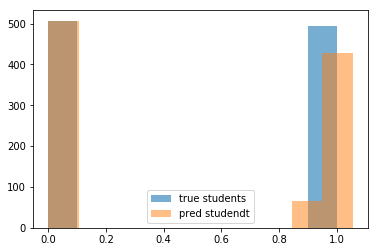

len qws_list 1


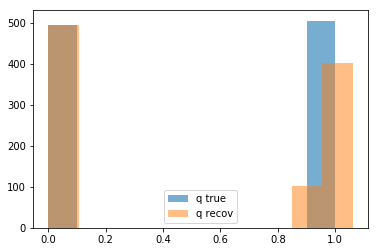

In [136]:
bin_spread = lambda x: max(1,int(abs(2*(numpy.max(x)-numpy.min(x)))))

for ss in stu_list:
    plt.hist(ss.flatten(), alpha=0.6, label="true students")#, bins=bin_spread(ss))
# plt.legend()
# plt.show()

sw_av_list = []
for sw, tups in zip(sws_list, tr_list):
    (sz,qz,pfz), (vsz,vqz,vpfz), (tsz,tqz,tpfz) = tups
    plt.hist(sw.flatten(), alpha=0.5, label="pred studendt")#, bins=bin_spread(sw))
    sw_av_list.append(numpy.median(sw.flatten()))
plt.legend()
plt.show()

real_max_q = numpy.max(questions.flatten())
print("len qws_list", len(qws_list))
plt.hist(questions.flatten(), alpha=.6, label="q true")#, bins=bin_spread(questions))
# plt.show()
# print(bin_spread(qws2))
for qw, tups, av in zip(qws_list, tr_list, sw_av_list):
    qw = copy.copy(qw)
#     print("med",numpy.median(qw))
    plt.hist(qw.flatten(), alpha=0.5, label="q recov")#, bins=bin_spread(qw))
plt.legend()
plt.show()

[ 0  0  0 ..., 13  9  5] [ 0  1  2 ..., 42  0 78] [ 2.  5.  3. ...,  2.  1.  3.]
[] [] []
[39 46  3 57 94 66  5 45 90 95 45 25 69 61 16 65  4 76  5 30 59 61 56 41 75
 70 56  1 36  5 57 34 82  2 17 63 98 36 13 17 46 45 93 32 30 58 39 72 37 26
 23 16 47 68  1 65 53 99 87 16 57 49 71 93 81 64 54 67 32  3 25 68 82 64 78
 79 30 98  2 97  3 33 21 85 73 33 57 36 87 61 70 18 84 64 29 46 46  0 81  2
 32 28 56 35 33 47 33 30 71 97 87 10 28  6 41 15 51 49 38 46 74 71 30 17 92
 31 76 75 90 91 12 15 21 89 87 20 19 83 46 34 85 66 23 36  5 60 19 52 46 93
 59 43 33 98 80 79 41 50 83 57 39 90  7 16 75 26 85 92 17 35 65 66 11 97 48
 67 77 77 31 10 20 59 10  2 95 97 83 63 69 21 61  4 32 85  2 23 28 92 36 95
 97 43 91 55  2 36 21 16  0 31 37 15 40 69 30 86  6 42 68  2 93 83 90 84 51
 86  6 76 28 42 51 20 74 11  0 59 84 12 42 61 38 52 48 88 26 14 18 58 63  2
 35 30 86 86  8 81 65 40  0 41  7 15 53 77 56 94  0 55 18 69 70 80 92 44 88
 68  8 63 57 75 36 34 67 93 19 62  6 37 53 92  9 27 30 24 31 62 66 77 64 9

2.0 [ 2.]
5.0 [ 5.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
5.0 [ 5.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
5.0 [ 5.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
1.0 [ 1.]
4.0 [ 4.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
6.0 [ 6.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
6.0 [ 6.]
2.0 [ 2.]
6.0 [ 6.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
5.0 [ 5.]
5.0 [ 5.]
5.0 [ 5.]
5.0 [ 5.]
3.0 [ 3.]
2.0 [ 2.]
5.0 [ 5.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
6.0 [ 6.]
2.0 [ 2.]


3.0 [ 3.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
5.0 [ 5.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
5.0 [ 5.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
0.0 [  2.332e-08]
3.0 [ 3.]
0.0 [  3.777e-08]
3.0 [ 3.]
5.0 [ 5.]
2.0 [ 2.]
2.0 [ 2.]
5.0 [ 5.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  7.223e-10]
4.0 [ 4.]
4.0 [ 4.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
5.0 [ 5.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
0.0 [  7.223e-10]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
4.0 [ 4.

3.0 [ 3.]
2.0 [ 2.]
0.0 [  3.765e-08]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
0.0 [  9.017e-09]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  9.017e-09]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
0.0 [  1.819e-08]
3.0 [ 3.]
1.0 [ 1.]
5.0 [ 5.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  1.213e-07]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
0.0 [  5.818e-08]
2.0 [ 2.]
0.0 [  9.484e-08]
3.0 [ 3.]
5.0 [ 5.]
3.0 [ 3.]
2.0 [ 2.]
3.0 

1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [  7.642e-08]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
5.0 [ 5.]
1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
5.0 [ 5.]
4.0 [ 4.]
0.0 [  2.994e-07]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [  3.879e-08]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
5.0 [ 5.]
5.0 [ 5.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
1.0 [ 1.]
0.0 [ 0.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 

2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
0.0 [ 0.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  3.425e-10]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  5.451e-08]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
4.0 [ 4.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
3.0 

2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
3.0 [ 3.]
5.0 [ 5.]
0.0 [  1.213e-07]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
0.0 [ 0.]
5.0 [ 5.]
4.0 [ 4.]
4.0 [ 4.]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
5.0 [ 5.]
5.0 [ 5.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
0.0 [  1.367e-07]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
0.0 [  3.959e-08]
3.0 [ 3.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [  3.765e-08]
3.0 [ 3.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
0.0 [  1.227e-15]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
0.0 [  3.529e-08]
1.0 [ 1.]
0.0 [  3.529e-08]
0.0 [  3.529e-08]
1.0 [ 1.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
0.0 [ 0.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
0.0 [  5.924e-08]
0.0 [ 0.]
1.0 [ 1.]
0.0 [  3.529e-08]
2.0 [ 2.]
2.0 [ 2.]


0.0 [  8.230e-08]
3.0 [ 3.]
5.0 [ 5.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
0.0 [  1.761e-07]
2.0 [ 2.]
3.0 [ 3.]
0.0 [  1.220e-07]
5.0 [ 5.]
4.0 [ 4.]
5.0 [ 5.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
5.0 [ 5.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [ 0.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
5.0 [ 5.]
5.0 [ 5.]
1.0 [ 1.]
4.0 [ 4.]
4.0 [ 4.]
0.0 [  8.846e-08]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
5.0 [ 5.]
1.0 [ 1.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
4.0 [ 4.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.

3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
0.0 [  3.995e-09]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
5.0 [ 5.]
1.0 [ 1.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
5.0 [ 5.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
1.0 [ 1.]
3.0 [ 3.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
0.0 [  1.997e-09]
4.0 [ 4.]
6.0 [ 6.]
1.0 [ 1.]
1.0 [ 1.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [  3.476e-08]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
0.0 [  1.415e-15]
6.0 [ 6.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
6.0 [ 6.]
1.0 [ 1.]
3.0 [ 3.]
5.0 [ 5.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
0.0 [  5.613e-10]
2.0 [ 2.]
1.0 [ 1.]


2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
5.0 [ 5.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
0.0 [  1.564e-07]
3.0 [ 3.]
1.0 [ 1.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
4.0 [ 4.]
1.0 [ 1.]
1.0 [ 1.]
4.0 [ 4.]
3.0 [ 3.]
5.0 [ 5.]
3.0 [ 3.]
2.0 [ 2.]
0.0 [  1.214e-07]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
4.0 [ 4.]
4.0 [ 4.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
1.0 [ 1.]
3.0 [ 3.]
1.0 [ 1.]
4.0 [ 4.]
2.0 [ 2.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
5.0 [ 5.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
4.0 [ 4.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
4.0 [ 4.]
3.0 [ 3.]
6.0 [ 6.]
1.0 [ 1.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
4.0 [ 4.]
2.0 [ 2.]
3.0 [ 3.]
5.0 [ 5.]
1.0 [ 1.]
2.0 [ 2.]
3.0 [ 3.]
2.0 [ 2.]
2.0 [ 2.]
1.0 [ 1.]
2.0 [ 2.]
2.0 [ 2.]
3.0 [ 3.]
3.0 [ 3.]
4.0 [ 4.]
2.0 [ 2.]
4.0 [ 4.]
0.0 [ 0.]
2.0 

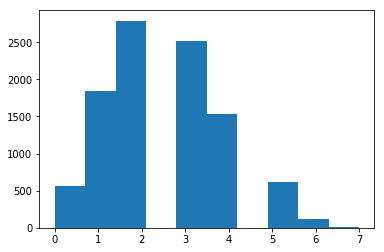

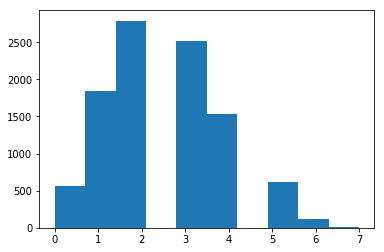

In [137]:
print(m_list)
for m,tr in zip(m_list, tr_list):
    (sz2,qz2,pfz2), (vsz2,vqz2,vpfz2), (tsz2,tqz2,tpfz2) = tr
    print(sz2,qz2,pfz2)
    print(vsz2,vqz2,vpfz2)
    print(tsz2,tqz2,tpfz2)
    preds = m.predict(x=[qz2,sz2])
    for sc_true, sc_hat in zip(pfz2,preds):
        print(sc_true, sc_hat)

    # print(m.evaluate(x=[mz,vz], y=scz))
    from sklearn.metrics import mean_absolute_error, mean_absolute_error
    print(mean_absolute_error(numpy.around(pfz2), numpy.around(preds)  ))
    
plt.hist(pfz2)
plt.show()
plt.hist(preds)
plt.show()

In [ ]:
from keras.callbacks import EarlyStopping
min_loss = math.inf
min_v_loss = math.inf
init_patience = 5
for i in range(100):
    print("shiteration i=",i)
    h = m.fit(x=[mz,vz], y=scz, batch_size=1000, epochs=2, shuffle=True, validation_split=1000/len(scz), verbose=1)
    val_loss = h.history["val_loss"][-1]
    loss = h.history["loss"][-1]
    if loss < min_loss and val_loss <= min_v_loss:
        min_v_loss = val_loss
        min_loss = loss
        print("patience reset")
        patience = init_patience
#         sw = s_table.get_weights()
#         qw = qn_table.get_weights()
    else:
        patience -= 1
    if patience==0:
        print("DONE")
        break
#     m.fit(x=[mz,vz], y=numpy.array([(0.5+random.uniform(-0.5,0.5)) for _ in scz]).reshape(-1,1), batch_size=1000, shuffle=False, epochs=10, verbose=0)
    m.fit(x=[mz,vz], y=numpy.array([0.5 for _ in scz]).reshape(-1,1), batch_size=1000, shuffle=False, epochs=2, verbose=0)
    
# s_table.set_weights(sw)
# qn_table.set_weights(qw)

In [ ]:
es = EarlyStopping(monitor="val_loss", restore_best_weights=True, patience=10)
m.fit(x=[mz,vz], y=scz, batch_size=1000, epochs=100, validation_split=1000/len(scz))#, callbacks=[es])

In [ ]:
preds = m.predict(x=[tmz,tvz])
for p, sc_obsv, sc_hat in zip(t_probz, tscz,preds):
    print(p, sc_obsv, sc_hat, (numpy.around(sc_obsv)==numpy.around(sc_hat)))

# print(m.evaluate(x=[tmz,tvz], y=tscz))
from sklearn.metrics import accuracy_score, mean_absolute_error

print("obvsd acc", accuracy_score(numpy.around(tscz), numpy.around(preds)))
print("non-stoch acc", accuracy_score(numpy.around(t_probz), numpy.around(preds)))
print(mean_absolute_error(t_probz, preds))
#0.000302638761699 MSE MxMul


In [ ]:
    plt.hist(obs.flatten())
    plt.show()
    print(numpy.sum(numpy.around(obs)))
    print(len(obs.flatten()))
    

In [43]:
def calc_arr_arr_err(split, real_wgts, pred_wgts, max_iter=10):
    from scipy.spatial.distance import cosine
# pred_wgts = numpy.round(pred_wgts,1)

    out_cols = [None] * len(real_wgts.T)
    curr_sel = None
    curr_ix = None
    n_iters = 10
    chosen = None
    
    indices = range(len(real_wgts.T))

    min_total_err = math.inf
    best_dis = math.inf
    for i in range(max_iter): #len(indices)**2):
        real_used = set()
        pred_used = set()
        while len(pred_used) < len(indices):
            curr_err = math.inf
            curr_cos = math.inf
            for rix in numpy.random.permutation(indices):
                if rix in real_used:
                    continue
                real_col = real_wgts.T[rix]
                for cix in numpy.random.permutation(indices):
                    if cix in pred_used:
                        continue
                    pred_col = pred_wgts.T[cix]
                    pred_col = pred_col #* pred_q_col
                    err = numpy.mean(numpy.abs( pred_col - real_col))
                    
                    if err < curr_err:
                        curr_sel = pred_col
                        curr_err = err
                        curr_cos = 0#cosine(pred_col, real_col)
                        curr_ix = cix
                        curr_real_ix = rix
            real_used.add(curr_real_ix)
            pred_used.add(curr_ix)
            out_cols[curr_real_ix] = curr_sel
        out_col_arr = numpy.array(out_cols).T
        total_err = numpy.mean(numpy.abs( out_col_arr - real_wgts ))
        
        dis = 0
        mean_ll = numpy.mean( out_col_arr - real_wgts )
        if total_err < min_total_err:
            min_total_err = total_err
            total_q_err = numpy.mean(numpy.abs( out_col_arr[0:split] - real_wgts[0:split] ))
            total_s_err = numpy.mean(numpy.abs( out_col_arr[split:] - real_wgts[split:] ))
            best_ll = mean_ll
            chosen = out_col_arr
            best_dis = dis
    return chosen, min_total_err, total_q_err, total_s_err, mean_ll, best_dis


In [45]:
pred_wgts = qn_table.get_weights()[0]
real_wgts = movies

split = 0

items_chosen, min_total_err, total_q_err, total_s_err, mean_ll, best_cos_dis = calc_arr_arr_err(0, real_wgts, pred_wgts, max_iter=10)

NameError: name 'qn_table' is not defined

In [ ]:
print(min_total_err, total_q_err, total_s_err)

print(items_chosen)



In [49]:
## fig = plt.gcf()
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
# pca = TSNE(n_components=2)

itemz_pred = items_chosen
n = len(items_chosen)
itemz = movies

# s_pred_mean = numpy.mean(s_table.get_weights()[0])
base = min( numpy.min(itemz_pred), numpy.min(itemz))
# ss1 = StandardScaler()
# itemz_pred = ss1.fit_transform(itemz_pred)
# itemz = ss1.transform(movies)

itemz = itemz - base
itemz_pred = itemz_pred - base

print(itemz)
print(itemz_pred)

NameError: name 'items_chosen' is not defined

In [139]:
import copy
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
s_offset = [0]
def plot_items(pred_list, real_items, s_offset):
#     tx=None
    tx = PCA(n_components=2)
#     tx = TSNE(n_components=2)
    fyrst = True
    Cs = []
    C_labs = []
    pred_list = numpy.array(pred_list)
    fitted_pred_list = []
#     offset = numpy.median(pred_list[(pred_list>0.1)], axis=0) - numpy.median(real_items[(real_items>0.1)], axis=0)
#     real_mean = numpy.min(real_items[real_items > 0.1])
#     offset = numpy.min(pred_list[pred_list > 0.1]) - real_mean
#     print("real mean", real_mean)
#     print("offset", offset)
    
    m = len(real_items)
    cols = list(range(m))
    shuffle(cols)
    
    xmeans = numpy.zeros(m)
    ymeans = numpy.zeros(m)
    pairs = defaultdict(list)
    iter = 0
    
    cp_real = copy.copy(real_items)
    cp_real[cp_real < 1] = numpy.nan
    r_offset=numpy.nanmedian(cp_real, axis=0)
    
    itemz_2 = None
    for opreds in pred_list:
        preds = copy.copy(opreds) - s_offset[iter] + r_offset
        split = 0
        
        items_chosen, min_total_err, total_q_err, total_s_err, mean_ll, best_cos_dis = calc_arr_arr_err(0, real_items, preds, max_iter=10)

        itemz_pred = items_chosen
        print(itemz_pred)
        itemz_pred = numpy.maximum(itemz_pred,0)
        fitted_pred_list.append(itemz_pred)
        n = len(itemz_pred)
#         itemz = real_items #- offset
#         print(numpy.min(itemz), numpy.mean(itemz), numpy.max(itemz))
        itemz = real_items
#         itemz = numpy.maximum(itemz,0)
#         print(numpy.min(itemz), numpy.mean(itemz), numpy.max(itemz))
        if itemz_2 is None:
            itemz_2 = numpy.concatenate([itemz, itemz_pred], axis=0)
        else:
            itemz_2 = numpy.concatenate([itemz_2, itemz_pred], axis=0)

    if tx:
        itemz_2 = tx.fit_transform(itemz_2)
#         itemz_2 = numpy.concatenate([itemz, itemz_pred], axis=0)
#         if fyrst:
#         itemz_2 = tx.fit_transform(itemz_2)
#             fyrst = False
#         else:
#             itemz_2 = tx.transform(itemz_2)

    from sklearn.cluster import KMeans
    iter=0
    for opreds, itemz_pred in zip(pred_list, fitted_pred_list):
        n = len(itemz_pred)
        km = KMeans()
        km.fit(itemz_pred)
        cluster_labels = km.predict(itemz_pred)
        print(cluster_labels)
        
        C = []
        for l in set(cluster_labels):
            cluster = list(numpy.where(cluster_labels==l)[0])
            print("X", cluster)
            C.append(cluster)
        Cs.append(C)
        C_labs.append(cluster_labels)
        
        fig = plt.gcf()
        fig.set_size_inches(10, 10)
                
#         NUM_COLORS = 100
#         cm = plt.get_cmap('gist_rainbow')
#         fig.gca().set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
        print(type(itemz_2))
        minix=n*(iter+1)
        maxix=n*(iter+1)+n
        
        #i=0 -> 100,199
        #i=2 -> 200,299
        
        print("no pts=",n," indices=", minix, maxix)
        fig.gca().scatter(itemz_2[minix:maxix,0], itemz_2[minix:maxix,1], alpha=0.7, c=numpy.array(cols), cmap=plt.get_cmap('nipy_spectral'))
        j=0
        for j in range(n):
            x,xh,y,yh = itemz_2[j+(n*iter),0], itemz_2[j+(n*iter+n) ,0], itemz_2[j+(n*iter),1], itemz_2[j+(n*iter+n),1]
#             fig.gca().plot([x,xh],[y,yh],  color="#aaaaaa80")
            xmeans[j] += xh
            ymeans[j] += yh
            pairs[iter].append((xh, yh))
        iter+=1
        
    for j in range(n):
        fig.gca().annotate(j, (itemz_2[j,0], itemz_2[j,1]))
        
    fig.gca().scatter(itemz_2[0:n,0], itemz_2[0:n,1], c="k", zorder=10)
#     fig.gca().axhline(y=1e-6, linestyle="--")
#     fig.gca().axvline(x=1e-6, linestyle="--")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    
    xmeans = xmeans / len(pred_list)
    ymeans = ymeans / len(pred_list)
    

    if len(pred_list)>1:
        for it in range(len(pred_list)):
            xhyh_pairs = pairs[it]
            for j,hat_pair in enumerate(xhyh_pairs):
                xh,yh = hat_pair
                x,y = itemz_2[j,0], itemz_2[j,1]
                mux = xmeans[j]
                muy = ymeans[j]
#                 fig.gca().scatter(xh, yh, alpha=0.7, c=plt.get_cmap('nipy_spectral')(cols[j]))
#                 fig.gca().scatter(mux,muy, c="#888888ff", marker="*", zorder=10)
#                 fig.gca().plot([mux,xh],[muy,yh],color="#aaaaaa80", linestyle="--")
#                 fig.gca().plot([mux,x],[muy,y],color="#888888dd", linestyle="-")
                fig.gca().plot([x,xh],[y,yh],color="#aaaaaa80", linestyle="--")
        
    plt.show()
    print("len Cs", len(Cs))
    from sklearn.metrics.cluster import adjusted_rand_score
    rands = []
    for ix in range(len(Cs)):
#         print(ix)
        for jx in range(len(Cs)):
#             print(jx)
            if ix!=jx:
#             print(Cs[ix], Cs[jx])
                print("VI:", ix,jx, varinfo(Cs[ix],Cs[jx]))
                a_rand = adjusted_rand_score(C_labs[ix], C_labs[jx])
                print("Rand:", a_rand)
                rands.append(a_rand)
    print("Mean rand score =", numpy.mean(rands), numpy.std(rands))

# qws = qn_table.get_weights()[0]
# qws2 = qn_table2.get_weights()[0]
        
print(len(qws_list))
plot_items(qws_list, copy.copy(questions), s_offset)

1


ValueError: cannot convert float NaN to integer

In [ ]:
# itemz_pred = pca.transform(itemz_pred)

itemz_2 = numpy.concatenate([itemz, itemz_pred], axis=0)
# itemz_2 = itemz
itemz_2 = pca.fit_transform(itemz_2)

# itemz_2 = MinMaxScaler().fit_transform(itemz_2)

# ixes = itemz_pred < baseline
# itemz_pred[ixes] = (baseline-1)
# itemz_pred = itemz_pred - (baseline-1)
# itemz_pred = MinMaxScaler().fit_transform(itemz_pred)
# print(itemz_2)

# fig,axs = plt.subplots(1,2)
fig = plt.gcf()
fig.set_size_inches(10, 10)

fig.gca().scatter(itemz_2[0:n,0], itemz_2[0:n,1], alpha=0.7)
fig.gca().scatter(itemz_2[n:,0], itemz_2[n:,1], alpha=0.7)
j=0
for j in range(n):
    x,xh,y,yh = itemz_2[j,0], itemz_2[j+n,0], itemz_2[j,1], itemz_2[j+n,1]
    fig.gca().plot([x,xh],[y,yh],color="#aaaaaa")
    fig.gca().annotate(j, (itemz_2[j+n,0], itemz_2[j+n,1]))

# fig.gca().scatter(itemz_pred[:,0], itemz_pred[:,1], alpha=0.5)

# for i, txt in enumerate(itemz_2):
#     fig.gca().annotate(i, (itemz_2[i,0], itemz_2[i,1]))

# fig.gca().axvline(x=baseline, linestyle="--")
# fig.gca().axhline(y=baseline, linestyle="--")

fig.show()